In [4]:
import matplotlib.pyplot as plt
from gensim import corpora, models
corpus = corpora.BleiCorpus(r"C:\Users\acer\Downloads\ML Lab\data\ap\ap.dat",r"C:\Users\acer\Downloads\ML Lab\data\ap\vocab.txt")

In [5]:
model = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word)

In [6]:
model = models.ldamodel.LdaModel(
 corpus, num_topics=100, id2word=corpus.id2word, alpha=None)

In [8]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(4, 0.36839977), (18, 0.015063194), (38, 0.043671902), (46, 0.1213354), (49, 0.08988217), (66, 0.019296348), (77, 0.20486273), (91, 0.084186964), (96, 0.025353964)]


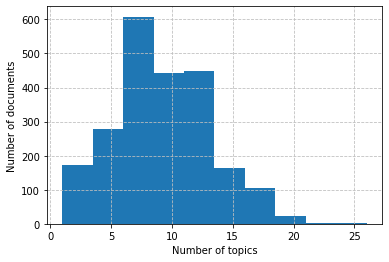

In [10]:
num_topics_used = [len(model[doc]) for doc in corpus]
plt.hist(num_topics_used)
plt.ylabel('Number of documents')
plt.xlabel('Number of topics')
plt.grid(True, linestyle='--', color='0.75')

In [12]:
model1 = models.ldamodel.LdaModel(corpus,num_topics=100,id2word=corpus.id2word,alpha=1)

In [13]:
doc = corpus.docbyoffset(0)
topics = model1[doc]
print(topics)

[(2, 0.011058658), (10, 0.010670012), (11, 0.013227412), (12, 0.012350126), (14, 0.021386115), (17, 0.010579937), (18, 0.03350953), (22, 0.014826489), (26, 0.012562194), (27, 0.014004036), (31, 0.015801134), (32, 0.01601545), (34, 0.010229593), (39, 0.010087518), (42, 0.012152068), (44, 0.011073511), (48, 0.01093277), (54, 0.010289944), (56, 0.018206157), (61, 0.011836796), (64, 0.01611305), (66, 0.016751109), (67, 0.02684887), (75, 0.015471057), (77, 0.018497001), (78, 0.016814739), (80, 0.013851974), (81, 0.017121738), (94, 0.03452709)]


Text(15, 156, 'alpha=1.0')

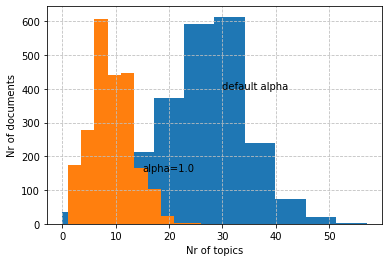

In [14]:
num_topics_used1 = [len(model1[doc]) for doc in corpus]
plt.hist(num_topics_used1)
plt.hist(num_topics_used)
plt.ylabel('Nr of documents')
plt.xlabel('Nr of topics')
plt.grid(True, linestyle='--', color='0.75')
plt.text(30, 400, r'default alpha')
plt.text(15, 156, 'alpha=1.0')

In [16]:
from gensim import matutils
topics = matutils.corpus2dense(model[corpus],num_terms=model.num_topics)
from scipy.spatial import distance
pairwise = distance.squareform(distance.pdist(topics))
largest = pairwise.max()
for ti in range(len(topics)):
    pairwise[ti,ti] = largest+1

In [17]:
def closest_to(doc_id):
    return pairwise[doc_id].argmin()

In [18]:
closest_to(1)

51

In [19]:
from __future__ import print_function
import numpy as np
import gensim
from os import path


In [42]:
warned_of_error = False

def create_cloud(oname, words,maxsize=120, fontname='Lobster'):
    '''Creates a word cloud (when pytagcloud is installed)
    Parameters
    ----------
    oname : output filename
    words : list of (value,str)
    maxsize : int, optional
        Size of maximum word. The best setting for this parameter will often
        require some manual tuning for each input.
    fontname : str, optional
        Font to use.
    '''
    try:
        from pytagcloud import create_tag_image, make_tags
    except ImportError:
        if not warned_of_error:
            print("Could not import pytagcloud. Skipping cloud generation")
        return

    # gensim returns a weight between 0 and 1 for each word, while pytagcloud
    # expects an integer word count. So, we multiply by a large number and
    # round. For a visualization this is an adequate approximation.
    words = [(w,int(v*10000)) for w,v in words]
    tags = make_tags(words, maxsize=maxsize)
    create_tag_image(tags, oname, size=(1800, 1200), fontname=fontname)

In [21]:
import logging, gensim

In [22]:
logging.basicConfig(
 format='%(asctime)s : %(levelname)s : %(message)s',
 level=logging.INFO)

In [24]:
id2word = gensim.corpora.Dictionary.load_from_text( r'C:\Users\acer\Downloads\ML Lab\data\wiki_en_output_wordids.txt.bz2')

In [25]:
mm = gensim.corpora.MmCorpus(r'C:\Users\acer\Downloads\ML Lab\data\wiki_en_output_tfidf.mm')

2020-01-03 09:31:00,236 : INFO : loaded corpus index from C:\Users\acer\Downloads\ML Lab\data\wiki_en_output_tfidf.mm.index
2020-01-03 09:31:00,237 : INFO : initializing cython corpus reader from C:\Users\acer\Downloads\ML Lab\data\wiki_en_output_tfidf.mm
2020-01-03 09:31:00,248 : INFO : accepted corpus with 4758810 documents, 100000 features, 757100253 non-zero entries


In [26]:
model = gensim.models.ldamodel.LdaModel(
 corpus=mm,
 id2word=id2word,
 num_topics=100,
 update_every=1,
 chunksize=10000,
 passes=1)

2020-01-03 09:31:16,825 : INFO : using symmetric alpha at 0.01
2020-01-03 09:31:16,826 : INFO : using symmetric eta at 0.01
2020-01-03 09:31:16,840 : INFO : using serial LDA version on this node
2020-01-03 09:31:17,852 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 4758810 documents, updating model once every 10000 documents, evaluating perplexity every 100000 documents, iterating 50x with a convergence threshold of 0.001000
2020-01-03 09:31:26,896 : INFO : PROGRESS: pass 0, at document #10000/4758810
2020-01-03 09:32:08,324 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:32:09,270 : INFO : topic #34 (0.010): 0.002*"politician" + 0.002*"player" + 0.002*"melville" + 0.002*"diocletian" + 0.002*"sexual" + 0.002*"maryland" + 0.002*"panthers" + 0.002*"myanmar" + 0.002*"andes" + 0.001*"french"
2020-01-03 09:32:09,272 : INFO : topic #27 (0.010): 0.002*"julian" + 0.002*"aircraft" + 0.001*"iran" 

2020-01-03 09:35:20,834 : INFO : topic #80 (0.010): 0.011*"pope" + 0.008*"rome" + 0.007*"roman" + 0.006*"emperor" + 0.006*"antiochus" + 0.005*"ptolemy" + 0.005*"church" + 0.005*"king" + 0.004*"seleucid" + 0.004*"byzantine"
2020-01-03 09:35:20,884 : INFO : topic diff=0.567938, rho=0.408248
2020-01-03 09:35:23,104 : INFO : PROGRESS: pass 0, at document #70000/4758810
2020-01-03 09:35:34,637 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:35:35,548 : INFO : topic #92 (0.010): 0.005*"plant" + 0.004*"plants" + 0.003*"food" + 0.002*"acid" + 0.002*"disease" + 0.002*"blood" + 0.002*"leaves" + 0.002*"fruit" + 0.002*"flowers" + 0.002*"sunflower"
2020-01-03 09:35:35,550 : INFO : topic #54 (0.010): 0.011*"king" + 0.006*"frankish" + 0.005*"approximate" + 0.004*"perryville" + 0.004*"byzantine" + 0.004*"saxon" + 0.004*"population" + 0.004*"son" + 0.004*"pepin" + 0.003*"ibn"
2020-01-03 09:35:35,552 : INFO : topic #8 (0.010): 0.031*"park" + 0.008*"protected

2020-01-03 09:38:56,024 : INFO : topic #96 (0.010): 0.002*"song" + 0.002*"chicago" + 0.002*"lp" + 0.002*"blues" + 0.002*"hall" + 0.001*"you" + 0.001*"anthem" + 0.001*"album" + 0.001*"mixing" + 0.001*"rock"
2020-01-03 09:38:56,075 : INFO : topic diff=0.496559, rho=0.288675
2020-01-03 09:39:00,882 : INFO : PROGRESS: pass 0, at document #130000/4758810
2020-01-03 09:39:26,441 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:39:27,331 : INFO : topic #50 (0.010): 0.016*"league" + 0.012*"championship" + 0.012*"football" + 0.010*"cup" + 0.009*"game" + 0.007*"win" + 0.007*"games" + 0.006*"players" + 0.006*"nfl" + 0.006*"nhl"
2020-01-03 09:39:27,333 : INFO : topic #90 (0.010): 0.005*"army" + 0.005*"navy" + 0.004*"ship" + 0.004*"battle" + 0.004*"military" + 0.004*"forces" + 0.003*"force" + 0.003*"ships" + 0.003*"naval" + 0.003*"command"
2020-01-03 09:39:27,336 : INFO : topic #62 (0.010): 0.011*"language" + 0.007*"languages" + 0.006*"word" + 0.005*"ver

2020-01-03 09:42:01,181 : INFO : topic diff=0.408078, rho=0.235702
2020-01-03 09:42:04,985 : INFO : PROGRESS: pass 0, at document #190000/4758810
2020-01-03 09:42:26,446 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:42:27,346 : INFO : topic #23 (0.010): 0.013*"syndrome" + 0.011*"brain" + 0.010*"correctional" + 0.009*"symptoms" + 0.009*"disorder" + 0.008*"muscle" + 0.008*"patients" + 0.008*"nerve" + 0.007*"pain" + 0.007*"treatment"
2020-01-03 09:42:27,348 : INFO : topic #28 (0.010): 0.023*"party" + 0.015*"election" + 0.009*"minister" + 0.008*"elected" + 0.008*"labour" + 0.008*"democratic" + 0.007*"parliament" + 0.006*"conservative" + 0.006*"political" + 0.005*"president"
2020-01-03 09:42:27,350 : INFO : topic #4 (0.010): 0.009*"radio" + 0.008*"tv" + 0.008*"channel" + 0.008*"television" + 0.008*"news" + 0.007*"show" + 0.006*"network" + 0.005*"bbc" + 0.005*"broadcast" + 0.004*"media"
2020-01-03 09:42:27,353 : INFO : topic #25 (0.010): 0.007*

2020-01-03 09:45:14,070 : INFO : topic diff=0.298978, rho=0.204124
2020-01-03 09:45:17,680 : INFO : PROGRESS: pass 0, at document #250000/4758810
2020-01-03 09:45:39,495 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:45:40,409 : INFO : topic #36 (0.010): 0.026*"game" + 0.014*"russian" + 0.013*"soviet" + 0.010*"games" + 0.008*"russia" + 0.007*"player" + 0.007*"moscow" + 0.006*"nintendo" + 0.006*"finnish" + 0.005*"finland"
2020-01-03 09:45:40,411 : INFO : topic #3 (0.010): 0.017*"coins" + 0.016*"coin" + 0.010*"calendar" + 0.010*"currency" + 0.008*"px" + 0.007*"holidays" + 0.006*"holiday" + 0.006*"silver" + 0.006*"mint" + 0.006*"reverse"
2020-01-03 09:45:40,414 : INFO : topic #33 (0.010): 0.021*"album" + 0.014*"band" + 0.008*"song" + 0.007*"albums" + 0.007*"guitar" + 0.007*"vocals" + 0.006*"chart" + 0.005*"songs" + 0.005*"records" + 0.005*"rock"
2020-01-03 09:45:40,417 : INFO : topic #19 (0.010): 0.011*"puerto" + 0.011*"spanish" + 0.010*"san"

2020-01-03 09:48:19,357 : INFO : PROGRESS: pass 0, at document #310000/4758810
2020-01-03 09:48:39,811 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:48:40,712 : INFO : topic #79 (0.010): 0.037*"aircraft" + 0.024*"air" + 0.018*"airport" + 0.015*"flight" + 0.010*"aviation" + 0.008*"airlines" + 0.008*"raf" + 0.008*"force" + 0.007*"flying" + 0.007*"boeing"
2020-01-03 09:48:40,715 : INFO : topic #69 (0.010): 0.010*"episode" + 0.006*"episodes" + 0.005*"television" + 0.005*"role" + 0.004*"movie" + 0.004*"tv" + 0.004*"show" + 0.004*"films" + 0.004*"award" + 0.003*"actor"
2020-01-03 09:48:40,717 : INFO : topic #56 (0.010): 0.065*"asteroid" + 0.044*"observatory" + 0.035*"craters" + 0.031*"planets" + 0.030*"minor" + 0.030*"astronomer" + 0.027*"discovered" + 0.026*"asteroids" + 0.022*"planet" + 0.018*"jupiter"
2020-01-03 09:48:40,720 : INFO : topic #89 (0.010): 0.043*"doubles" + 0.021*"xbox" + 0.017*"disney" + 0.016*"coaster" + 0.013*"ride" + 0.012*"

2020-01-03 09:51:02,829 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:51:03,755 : INFO : topic #56 (0.010): 0.082*"craters" + 0.049*"asteroid" + 0.038*"observatory" + 0.024*"planets" + 0.023*"astronomer" + 0.022*"minor" + 0.019*"planet" + 0.018*"discovered" + 0.018*"asteroids" + 0.017*"mars"
2020-01-03 09:51:03,757 : INFO : topic #62 (0.010): 0.017*"language" + 0.010*"languages" + 0.008*"word" + 0.006*"words" + 0.005*"spoken" + 0.005*"verb" + 0.004*"japanese" + 0.004*"speakers" + 0.004*"dialect" + 0.004*"dialects"
2020-01-03 09:51:03,759 : INFO : topic #75 (0.010): 0.019*"chinese" + 0.017*"china" + 0.011*"kong" + 0.011*"hong" + 0.007*"taiwan" + 0.007*"beijing" + 0.005*"li" + 0.005*"dynasty" + 0.004*"singapore" + 0.004*"shanghai"
2020-01-03 09:51:03,762 : INFO : topic #79 (0.010): 0.040*"aircraft" + 0.025*"air" + 0.017*"airport" + 0.014*"flight" + 0.010*"aviation" + 0.009*"raf" + 0.008*"airlines" + 0.008*"flying" + 0.008*"force" + 0.007*"s

2020-01-03 09:53:48,589 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 09:53:49,519 : INFO : topic #96 (0.010): 0.007*"baseball" + 0.004*"league" + 0.004*"chicago" + 0.003*"game" + 0.003*"sox" + 0.003*"pitcher" + 0.003*"hit" + 0.003*"yankees" + 0.002*"runs" + 0.002*"run"
2020-01-03 09:53:49,521 : INFO : topic #19 (0.010): 0.012*"spanish" + 0.012*"puerto" + 0.010*"mexico" + 0.010*"san" + 0.009*"el" + 0.009*"la" + 0.008*"mexican" + 0.007*"rico" + 0.007*"juan" + 0.006*"josé"
2020-01-03 09:53:49,523 : INFO : topic #42 (0.010): 0.008*"oil" + 0.006*"mining" + 0.006*"energy" + 0.005*"mine" + 0.005*"water" + 0.005*"environmental" + 0.005*"coal" + 0.005*"gas" + 0.004*"plant" + 0.004*"agriculture"
2020-01-03 09:53:49,525 : INFO : topic #21 (0.010): 0.024*"wine" + 0.013*"beer" + 0.011*"grape" + 0.010*"wines" + 0.010*"sha" + 0.010*"tea" + 0.009*"kowloon" + 0.009*"drink" + 0.007*"cola" + 0.006*"postcode"
2020-01-03 09:53:49,527 : INFO : topic #72 (0.010):

2020-01-03 09:56:03,197 : INFO : topic #34 (0.010): 0.018*"bird" + 0.015*"birds" + 0.011*"woodpecker" + 0.011*"inca" + 0.010*"peru" + 0.010*"cerro" + 0.009*"peruvian" + 0.009*"iris" + 0.009*"chatham" + 0.009*"goose"
2020-01-03 09:56:03,199 : INFO : topic #3 (0.010): 0.035*"px" + 0.022*"coins" + 0.021*"coin" + 0.011*"currency" + 0.011*"astrology" + 0.010*"calendar" + 0.009*"banknotes" + 0.008*"mint" + 0.008*"coinage" + 0.007*"clock"
2020-01-03 09:56:03,202 : INFO : topic #57 (0.010): 0.024*"cards" + 0.022*"game" + 0.016*"card" + 0.015*"ball" + 0.015*"player" + 0.012*"players" + 0.008*"ethiopia" + 0.008*"ethiopian" + 0.007*"play" + 0.006*"rules"
2020-01-03 09:56:03,204 : INFO : topic #4 (0.010): 0.015*"radio" + 0.012*"station" + 0.010*"channel" + 0.010*"fm" + 0.009*"news" + 0.009*"tv" + 0.009*"television" + 0.008*"show" + 0.007*"broadcasting" + 0.006*"network"
2020-01-03 09:56:03,256 : INFO : topic diff=0.092239, rho=0.142857
2020-01-03 09:56:32,144 : INFO : -24.285 per-word bound, 20437

2020-01-03 09:58:39,903 : INFO : topic #10 (0.010): 0.009*"software" + 0.008*"server" + 0.007*"data" + 0.007*"user" + 0.006*"web" + 0.005*"users" + 0.005*"windows" + 0.005*"microsoft" + 0.004*"information" + 0.004*"file"
2020-01-03 09:58:39,905 : INFO : topic #69 (0.010): 0.011*"episode" + 0.006*"episodes" + 0.005*"television" + 0.005*"tv" + 0.005*"role" + 0.004*"films" + 0.004*"movie" + 0.004*"show" + 0.004*"actor" + 0.003*"award"
2020-01-03 09:58:39,907 : INFO : topic #41 (0.010): 0.026*"till" + 0.024*"bar" + 0.019*"color" + 0.017*"text" + 0.016*"rifle" + 0.013*"gun" + 0.013*"mm" + 0.012*"swedish" + 0.009*"pistol" + 0.009*"barrel"
2020-01-03 09:58:39,909 : INFO : topic #3 (0.010): 0.046*"px" + 0.023*"coins" + 0.021*"coin" + 0.013*"mint" + 0.011*"dollar" + 0.010*"currency" + 0.010*"calendar" + 0.009*"clock" + 0.008*"coinage" + 0.008*"silver"
2020-01-03 09:58:39,959 : INFO : topic diff=0.078132, rho=0.134840
2020-01-03 09:58:42,562 : INFO : PROGRESS: pass 0, at document #560000/4758810

2020-01-03 10:01:12,391 : INFO : topic #56 (0.010): 0.048*"observatory" + 0.038*"craters" + 0.028*"asteroid" + 0.024*"chaplin" + 0.021*"astronomical" + 0.020*"telescope" + 0.018*"astronomer" + 0.016*"astronomy" + 0.016*"planet" + 0.014*"ayrshire"
2020-01-03 10:01:12,393 : INFO : topic #7 (0.010): 0.009*"engine" + 0.006*"car" + 0.005*"cars" + 0.004*"engines" + 0.004*"vehicle" + 0.004*"design" + 0.004*"speed" + 0.004*"model" + 0.004*"vehicles" + 0.003*"rear"
2020-01-03 10:01:12,395 : INFO : topic #82 (0.010): 0.021*"jewish" + 0.017*"croatian" + 0.014*"israel" + 0.012*"rabbi" + 0.011*"jews" + 0.010*"croatia" + 0.010*"hebrew" + 0.010*"serbian" + 0.010*"israeli" + 0.008*"bosnia"
2020-01-03 10:01:12,398 : INFO : topic #20 (0.010): 0.053*"al" + 0.030*"ibn" + 0.017*"muhammad" + 0.017*"islamic" + 0.014*"abu" + 0.013*"islam" + 0.011*"arab" + 0.011*"muslim" + 0.011*"arabic" + 0.010*"ali"
2020-01-03 10:01:12,447 : INFO : topic diff=0.063677, rho=0.128037
2020-01-03 10:01:14,966 : INFO : PROGRESS: 

2020-01-03 10:03:11,274 : INFO : topic #50 (0.010): 0.013*"league" + 0.011*"cup" + 0.010*"football" + 0.007*"games" + 0.007*"nhl" + 0.007*"championships" + 0.006*"championship" + 0.006*"coach" + 0.006*"game" + 0.006*"goals"
2020-01-03 10:03:11,276 : INFO : topic #99 (0.010): 0.010*"flag" + 0.009*"arms" + 0.007*"worn" + 0.007*"brewery" + 0.006*"coat" + 0.006*"svg" + 0.005*"seal" + 0.005*"wear" + 0.005*"afl" + 0.005*"blue"
2020-01-03 10:03:11,278 : INFO : topic #16 (0.010): 0.017*"protein" + 0.015*"cell" + 0.014*"cells" + 0.013*"dna" + 0.011*"proteins" + 0.009*"membrane" + 0.008*"gene" + 0.008*"enzyme" + 0.007*"acid" + 0.007*"amino"
2020-01-03 10:03:11,330 : INFO : topic diff=0.062466, rho=0.122169
2020-01-03 10:03:13,718 : INFO : PROGRESS: pass 0, at document #680000/4758810
2020-01-03 10:03:29,902 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:03:30,808 : INFO : topic #58 (0.010): 0.008*"food" + 0.006*"dish" + 0.006*"cheese" + 0.005*"meat"

2020-01-03 10:05:29,881 : INFO : topic #88 (0.010): 0.005*"instrument" + 0.004*"bumps" + 0.003*"instruments" + 0.003*"drum" + 0.003*"hand" + 0.002*"strings" + 0.002*"sound" + 0.002*"cipher" + 0.002*"metal" + 0.002*"blade"
2020-01-03 10:05:29,883 : INFO : topic #57 (0.010): 0.022*"game" + 0.019*"cards" + 0.016*"ball" + 0.016*"card" + 0.014*"player" + 0.011*"players" + 0.007*"ethiopia" + 0.007*"rules" + 0.007*"ethiopian" + 0.006*"play"
2020-01-03 10:05:29,885 : INFO : topic #33 (0.010): 0.019*"album" + 0.012*"band" + 0.011*"song" + 0.008*"vocals" + 0.008*"guitar" + 0.007*"chart" + 0.006*"track" + 0.006*"records" + 0.005*"albums" + 0.005*"songs"
2020-01-03 10:05:29,935 : INFO : topic diff=0.056160, rho=0.117041
2020-01-03 10:05:32,391 : INFO : PROGRESS: pass 0, at document #740000/4758810
2020-01-03 10:05:48,675 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:05:49,611 : INFO : topic #33 (0.010): 0.019*"album" + 0.012*"band" + 0.011*"song" + 0

2020-01-03 10:07:23,171 : INFO : topic #15 (0.010): 0.005*"god" + 0.004*"greek" + 0.004*"ancient" + 0.003*"mythology" + 0.003*"roman" + 0.003*"goddess" + 0.003*"poem" + 0.003*"text" + 0.002*"gods" + 0.002*"latin"
2020-01-03 10:07:23,174 : INFO : topic #12 (0.010): 0.025*"scouts" + 0.016*"trinidad" + 0.015*"papua" + 0.015*"islands" + 0.015*"barbados" + 0.015*"caribbean" + 0.014*"guinea" + 0.013*"lès" + 0.013*"utah" + 0.013*"tobago"
2020-01-03 10:07:23,223 : INFO : topic diff=0.049208, rho=0.112509
2020-01-03 10:07:47,188 : INFO : -24.844 per-word bound, 30118929.3 perplexity estimate based on a held-out corpus of 10000 documents with 78646 words
2020-01-03 10:07:47,189 : INFO : PROGRESS: pass 0, at document #800000/4758810
2020-01-03 10:08:01,946 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:08:02,886 : INFO : topic #34 (0.010): 0.019*"wv" + 0.018*"birds" + 0.018*"peru" + 0.016*"bird" + 0.013*"turtle" + 0.013*"bolivia" + 0.010*"nicobar" + 

2020-01-03 10:09:33,942 : INFO : topic #69 (0.010): 0.009*"episode" + 0.006*"television" + 0.006*"tv" + 0.005*"episodes" + 0.005*"films" + 0.005*"role" + 0.004*"actor" + 0.004*"movie" + 0.004*"show" + 0.004*"award"
2020-01-03 10:09:33,944 : INFO : topic #65 (0.010): 0.016*"comics" + 0.010*"comic" + 0.006*"marvel" + 0.004*"character" + 0.004*"dc" + 0.004*"batman" + 0.004*"strip" + 0.003*"book" + 0.003*"manga" + 0.003*"man"
2020-01-03 10:09:33,994 : INFO : topic diff=0.043775, rho=0.108465
2020-01-03 10:09:36,252 : INFO : PROGRESS: pass 0, at document #860000/4758810
2020-01-03 10:09:51,111 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:09:52,021 : INFO : topic #90 (0.010): 0.008*"army" + 0.006*"navy" + 0.006*"regiment" + 0.006*"ship" + 0.005*"military" + 0.005*"battle" + 0.004*"forces" + 0.004*"force" + 0.004*"naval" + 0.004*"command"
2020-01-03 10:09:52,023 : INFO : topic #27 (0.010): 0.009*"turkish" + 0.009*"turkey" + 0.008*"iran" + 0.006

2020-01-03 10:11:41,692 : INFO : topic #55 (0.010): 0.019*"lp" + 0.016*"auckland" + 0.012*"mixing" + 0.010*"saxophone" + 0.009*"acoustic" + 0.009*"piano" + 0.009*"wanna" + 0.008*"remixes" + 0.007*"mccartney" + 0.007*"ain"
2020-01-03 10:11:41,695 : INFO : topic #18 (0.010): 0.009*"church" + 0.009*"castle" + 0.008*"jpg" + 0.006*"building" + 0.006*"file" + 0.005*"tower" + 0.004*"stone" + 0.004*"palace" + 0.004*"site" + 0.004*"buildings"
2020-01-03 10:11:41,743 : INFO : topic diff=0.040207, rho=0.104828
2020-01-03 10:11:43,867 : INFO : PROGRESS: pass 0, at document #920000/4758810
2020-01-03 10:11:58,452 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:11:59,378 : INFO : topic #5 (0.010): 0.012*"species" + 0.004*"black" + 0.004*"habitat" + 0.004*"subspecies" + 0.003*"white" + 0.003*"birds" + 0.003*"breeding" + 0.003*"tree" + 0.003*"eggs" + 0.003*"animals"
2020-01-03 10:11:59,380 : INFO : topic #79 (0.010): 0.049*"airport" + 0.034*"aircraft" + 0.

2020-01-03 10:13:27,769 : INFO : topic #49 (0.010): 0.016*"village" + 0.015*"parish" + 0.008*"road" + 0.008*"church" + 0.006*"england" + 0.005*"population" + 0.004*"centre" + 0.004*"council" + 0.004*"census" + 0.004*"town"
2020-01-03 10:13:27,817 : INFO : topic diff=0.036237, rho=0.101535
2020-01-03 10:13:29,960 : INFO : PROGRESS: pass 0, at document #980000/4758810
2020-01-03 10:13:44,359 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:13:45,281 : INFO : topic #24 (0.010): 0.038*"island" + 0.018*"islands" + 0.012*"bay" + 0.009*"sea" + 0.009*"beach" + 0.007*"cape" + 0.007*"coast" + 0.006*"antarctic" + 0.006*"ocean" + 0.006*"reef"
2020-01-03 10:13:45,283 : INFO : topic #77 (0.010): 0.014*"research" + 0.012*"professor" + 0.011*"science" + 0.009*"institute" + 0.007*"sciences" + 0.007*"society" + 0.007*"journal" + 0.007*"engineering" + 0.005*"physics" + 0.005*"studies"
2020-01-03 10:13:45,285 : INFO : topic #19 (0.010): 0.013*"mexico" + 0.012*"

2020-01-03 10:15:30,381 : INFO : topic #6 (0.010): 0.016*"students" + 0.010*"schools" + 0.008*"education" + 0.006*"campus" + 0.005*"student" + 0.004*"program" + 0.004*"secondary" + 0.004*"girls" + 0.004*"elementary" + 0.004*"boys"
2020-01-03 10:15:30,432 : INFO : topic diff=0.050184, rho=0.098533
2020-01-03 10:15:32,270 : INFO : PROGRESS: pass 0, at document #1040000/4758810
2020-01-03 10:15:45,370 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:15:46,310 : INFO : topic #29 (0.010): 0.025*"peakposition" + 0.020*"wanderers" + 0.015*"nashville" + 0.014*"leeds" + 0.014*"certifications" + 0.013*"acoustic" + 0.012*"bradford" + 0.012*"parton" + 0.012*"fiddle" + 0.011*"sunderland"
2020-01-03 10:15:46,313 : INFO : topic #66 (0.010): 0.032*"code" + 0.026*"disambiguation" + 0.014*"iata" + 0.012*"asl" + 0.012*"codes" + 0.011*"refer" + 0.011*"letter" + 0.010*"alphabet" + 0.008*"consonants" + 0.008*"iso"
2020-01-03 10:15:46,315 : INFO : topic #85 (0.010

2020-01-03 10:17:09,031 : INFO : topic #25 (0.010): 0.009*"court" + 0.008*"law" + 0.005*"act" + 0.004*"rights" + 0.004*"police" + 0.004*"justice" + 0.004*"supreme" + 0.003*"judge" + 0.003*"legal" + 0.003*"case"
2020-01-03 10:17:09,082 : INFO : topic diff=0.035027, rho=0.095783
2020-01-03 10:17:31,263 : INFO : -24.753 per-word bound, 28266034.1 perplexity estimate based on a held-out corpus of 10000 documents with 76448 words
2020-01-03 10:17:31,264 : INFO : PROGRESS: pass 0, at document #1100000/4758810
2020-01-03 10:17:45,093 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:17:46,009 : INFO : topic #4 (0.010): 0.020*"station" + 0.017*"radio" + 0.015*"fm" + 0.014*"channel" + 0.011*"tv" + 0.010*"television" + 0.010*"news" + 0.010*"show" + 0.009*"broadcasting" + 0.007*"broadcast"
2020-01-03 10:17:46,011 : INFO : topic #36 (0.010): 0.036*"game" + 0.011*"player" + 0.009*"gameplay" + 0.009*"games" + 0.008*"playstation" + 0.007*"russian" + 0.006*"

2020-01-03 10:19:05,348 : INFO : topic #21 (0.010): 0.031*"wine" + 0.019*"beer" + 0.015*"grape" + 0.013*"wines" + 0.010*"drink" + 0.009*"tea" + 0.008*"cola" + 0.008*"templar" + 0.008*"lam" + 0.008*"grapes"
2020-01-03 10:19:05,398 : INFO : topic diff=0.034732, rho=0.093250
2020-01-03 10:19:07,411 : INFO : PROGRESS: pass 0, at document #1160000/4758810
2020-01-03 10:19:20,990 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:19:21,946 : INFO : topic #43 (0.010): 0.016*"fairy" + 0.014*"ballad" + 0.010*"hardy" + 0.010*"fells" + 0.008*"doll" + 0.008*"ballads" + 0.008*"tale" + 0.006*"blackwood" + 0.006*"jacobs" + 0.006*"tarn"
2020-01-03 10:19:21,948 : INFO : topic #17 (0.010): 0.018*"italian" + 0.014*"di" + 0.010*"art" + 0.009*"san" + 0.009*"italy" + 0.009*"borders" + 0.008*"municipality" + 0.008*"municipalities" + 0.008*"province" + 0.007*"region"
2020-01-03 10:19:21,951 : INFO : topic #88 (0.010): 0.005*"instrument" + 0.003*"instruments" + 0.003*

2020-01-03 10:21:00,717 : INFO : topic #13 (0.010): 0.098*"eng" + 0.022*"westfield" + 0.017*"mutant" + 0.014*"staffordshire" + 0.013*"chesterfield" + 0.012*"logan" + 0.011*"briggs" + 0.010*"piper" + 0.009*"api" + 0.009*"dawson"
2020-01-03 10:21:00,766 : INFO : topic diff=0.032140, rho=0.090909
2020-01-03 10:21:02,748 : INFO : PROGRESS: pass 0, at document #1220000/4758810
2020-01-03 10:21:15,962 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:21:16,906 : INFO : topic #2 (0.010): 0.021*"species" + 0.015*"genus" + 0.006*"plant" + 0.006*"plants" + 0.005*"genera" + 0.005*"dorsal" + 0.004*"flowers" + 0.004*"teeth" + 0.004*"cm" + 0.004*"fins"
2020-01-03 10:21:16,909 : INFO : topic #72 (0.010): 0.023*"river" + 0.018*"lake" + 0.011*"mountain" + 0.010*"park" + 0.008*"creek" + 0.007*"dam" + 0.006*"flows" + 0.006*"mountains" + 0.006*"valley" + 0.006*"water"
2020-01-03 10:21:16,911 : INFO : topic #49 (0.010): 0.014*"village" + 0.013*"parish" + 0.008*"e

2020-01-03 10:22:36,249 : INFO : topic diff=0.029132, rho=0.088736
2020-01-03 10:22:38,118 : INFO : PROGRESS: pass 0, at document #1280000/4758810
2020-01-03 10:22:51,182 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:22:52,111 : INFO : topic #29 (0.010): 0.029*"peakposition" + 0.021*"qf" + 0.016*"certifications" + 0.013*"wanderers" + 0.013*"acoustic" + 0.013*"bradford" + 0.013*"rpm" + 0.011*"jennings" + 0.011*"hershey" + 0.011*"swindon"
2020-01-03 10:22:52,113 : INFO : topic #23 (0.010): 0.032*"hospital" + 0.016*"medical" + 0.013*"health" + 0.012*"patients" + 0.010*"care" + 0.009*"patient" + 0.009*"surgery" + 0.008*"syndrome" + 0.008*"brain" + 0.007*"treatment"
2020-01-03 10:22:52,115 : INFO : topic #51 (0.010): 0.036*"zimbabwe" + 0.030*"zimbabwean" + 0.019*"harare" + 0.019*"rhodesia" + 0.017*"weir" + 0.016*"matrices" + 0.015*"vertices" + 0.014*"intersects" + 0.014*"knot" + 0.013*"algebraic"
2020-01-03 10:22:52,117 : INFO : topic #6 (0.01

2020-01-03 10:24:32,258 : INFO : topic diff=0.027959, rho=0.086711
2020-01-03 10:24:34,148 : INFO : PROGRESS: pass 0, at document #1340000/4758810
2020-01-03 10:24:47,137 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:24:48,069 : INFO : topic #30 (0.010): 0.031*"population" + 0.025*"swiss" + 0.023*"sector" + 0.023*"municipality" + 0.023*"slalom" + 0.015*"till" + 0.014*"canton" + 0.012*"start" + 0.012*"switzerland" + 0.011*"text"
2020-01-03 10:24:48,072 : INFO : topic #83 (0.010): 0.028*"scotland" + 0.027*"scottish" + 0.027*"australia" + 0.021*"queensland" + 0.020*"australian" + 0.019*"sydney" + 0.016*"wales" + 0.014*"glasgow" + 0.013*"brisbane" + 0.012*"edinburgh"
2020-01-03 10:24:48,074 : INFO : topic #51 (0.010): 0.036*"zimbabwe" + 0.024*"zimbabwean" + 0.018*"rhodesia" + 0.018*"weir" + 0.017*"meridian" + 0.016*"harare" + 0.015*"intersects" + 0.015*"vertices" + 0.013*"matrices" + 0.012*"knot"
2020-01-03 10:24:48,077 : INFO : topic #87 (0.

2020-01-03 10:26:25,762 : INFO : -25.745 per-word bound, 56226027.6 perplexity estimate based on a held-out corpus of 10000 documents with 74373 words
2020-01-03 10:26:25,763 : INFO : PROGRESS: pass 0, at document #1400000/4758810
2020-01-03 10:26:38,616 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:26:39,549 : INFO : topic #49 (0.010): 0.015*"parish" + 0.014*"village" + 0.008*"england" + 0.008*"road" + 0.007*"yorkshire" + 0.007*"church" + 0.005*"centre" + 0.005*"town" + 0.004*"civil" + 0.004*"derbyshire"
2020-01-03 10:26:39,551 : INFO : topic #50 (0.010): 0.016*"cup" + 0.015*"league" + 0.012*"championships" + 0.012*"football" + 0.008*"goals" + 0.008*"games" + 0.007*"olympics" + 0.006*"olympic" + 0.006*"division" + 0.006*"championship"
2020-01-03 10:26:39,553 : INFO : topic #47 (0.010): 0.067*"van" + 0.060*"dutch" + 0.058*"belgian" + 0.043*"belgium" + 0.029*"flemish" + 0.027*"brussels" + 0.026*"netherlands" + 0.026*"antwerp" + 0.019*"flan

2020-01-03 10:27:56,084 : INFO : topic diff=0.025701, rho=0.083045
2020-01-03 10:27:57,985 : INFO : PROGRESS: pass 0, at document #1460000/4758810
2020-01-03 10:28:10,909 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:28:11,821 : INFO : topic #71 (0.010): 0.009*"sir" + 0.005*"william" + 0.005*"baronet" + 0.005*"london" + 0.005*"lord" + 0.004*"earl" + 0.004*"son" + 0.004*"baron" + 0.004*"married" + 0.004*"thomas"
2020-01-03 10:28:11,823 : INFO : topic #18 (0.010): 0.010*"castle" + 0.010*"church" + 0.008*"jpg" + 0.005*"building" + 0.005*"file" + 0.004*"tower" + 0.004*"stone" + 0.004*"site" + 0.003*"museum" + 0.003*"chapel"
2020-01-03 10:28:11,825 : INFO : topic #7 (0.010): 0.009*"engine" + 0.006*"car" + 0.004*"design" + 0.004*"engines" + 0.004*"cars" + 0.004*"speed" + 0.004*"vehicle" + 0.003*"model" + 0.003*"mm" + 0.003*"cc"
2020-01-03 10:28:11,828 : INFO : topic #46 (0.010): 0.015*"orchestra" + 0.012*"opera" + 0.010*"piano" + 0.009*"symphon

2020-01-03 10:29:47,944 : INFO : topic diff=0.031192, rho=0.081379
2020-01-03 10:29:49,724 : INFO : PROGRESS: pass 0, at document #1520000/4758810
2020-01-03 10:30:01,721 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:30:02,649 : INFO : topic #28 (0.010): 0.017*"party" + 0.017*"election" + 0.011*"elected" + 0.008*"congress" + 0.007*"minister" + 0.007*"republican" + 0.007*"democratic" + 0.007*"elections" + 0.007*"liberal" + 0.007*"candidate"
2020-01-03 10:30:02,651 : INFO : topic #16 (0.010): 0.040*"rna" + 0.020*"protein" + 0.013*"gene" + 0.013*"cell" + 0.013*"rnas" + 0.010*"box" + 0.009*"cells" + 0.009*"proteins" + 0.008*"enzyme" + 0.007*"biogenesis"
2020-01-03 10:30:02,653 : INFO : topic #72 (0.010): 0.020*"river" + 0.018*"lake" + 0.013*"mountain" + 0.009*"park" + 0.007*"creek" + 0.007*"mountains" + 0.006*"dam" + 0.006*"valley" + 0.006*"flows" + 0.005*"water"
2020-01-03 10:30:02,655 : INFO : topic #64 (0.010): 0.018*"plasmodium" + 0.017*"

2020-01-03 10:31:16,182 : INFO : topic diff=0.028632, rho=0.079809
2020-01-03 10:31:17,815 : INFO : PROGRESS: pass 0, at document #1580000/4758810
2020-01-03 10:31:29,262 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:31:30,204 : INFO : topic #46 (0.010): 0.015*"orchestra" + 0.012*"opera" + 0.010*"piano" + 0.010*"symphony" + 0.009*"composer" + 0.008*"theatre" + 0.007*"violin" + 0.006*"festival" + 0.006*"musical" + 0.005*"conductor"
2020-01-03 10:31:30,206 : INFO : topic #34 (0.010): 0.036*"warbler" + 0.025*"hummingbird" + 0.023*"birds" + 0.017*"peru" + 0.013*"finch" + 0.012*"throated" + 0.012*"bellied" + 0.011*"passeriformes" + 0.011*"bird" + 0.011*"rufous"
2020-01-03 10:31:30,208 : INFO : topic #8 (0.010): 0.037*"canada" + 0.034*"canadian" + 0.030*"ontario" + 0.023*"quebec" + 0.017*"toronto" + 0.017*"alberta" + 0.016*"edmonton" + 0.016*"calgary" + 0.013*"montreal" + 0.013*"saskatchewan"
2020-01-03 10:31:30,210 : INFO : topic #65 (0.010): 

2020-01-03 10:32:51,701 : INFO : topic diff=0.026095, rho=0.078326
2020-01-03 10:32:53,295 : INFO : PROGRESS: pass 0, at document #1640000/4758810
2020-01-03 10:33:04,756 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:33:05,664 : INFO : topic #17 (0.010): 0.014*"art" + 0.014*"italian" + 0.009*"painter" + 0.009*"di" + 0.009*"museum" + 0.007*"serie" + 0.007*"italy" + 0.006*"gallery" + 0.006*"painting" + 0.005*"paintings"
2020-01-03 10:33:05,666 : INFO : topic #16 (0.010): 0.027*"rna" + 0.021*"protein" + 0.013*"gene" + 0.012*"cell" + 0.010*"cells" + 0.010*"proteins" + 0.009*"receptor" + 0.008*"enzyme" + 0.008*"rnas" + 0.008*"dna"
2020-01-03 10:33:05,668 : INFO : topic #68 (0.010): 0.058*"station" + 0.038*"railway" + 0.028*"line" + 0.012*"rail" + 0.011*"trains" + 0.010*"train" + 0.010*"bus" + 0.009*"stations" + 0.009*"platforms" + 0.009*"metro"
2020-01-03 10:33:05,670 : INFO : topic #23 (0.010): 0.035*"hospital" + 0.023*"medical" + 0.016*"heal

2020-01-03 10:34:39,708 : INFO : -25.366 per-word bound, 43229223.4 perplexity estimate based on a held-out corpus of 10000 documents with 71085 words
2020-01-03 10:34:39,709 : INFO : PROGRESS: pass 0, at document #1700000/4758810
2020-01-03 10:34:51,866 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:34:52,778 : INFO : topic #60 (0.010): 0.055*"japanese" + 0.047*"osaka" + 0.038*"japan" + 0.036*"kyoto" + 0.029*"domain" + 0.027*"clan" + 0.027*"tokugawa" + 0.026*"edo" + 0.019*"daimyō" + 0.014*"nara"
2020-01-03 10:34:52,780 : INFO : topic #62 (0.010): 0.016*"language" + 0.011*"japanese" + 0.009*"tokyo" + 0.008*"languages" + 0.005*"japan" + 0.005*"spoken" + 0.005*"kami" + 0.005*"word" + 0.005*"ni" + 0.004*"linguistics"
2020-01-03 10:34:52,782 : INFO : topic #80 (0.010): 0.024*"bishop" + 0.024*"church" + 0.018*"diocese" + 0.015*"catholic" + 0.010*"roman" + 0.008*"cathedral" + 0.008*"pope" + 0.008*"archbishop" + 0.007*"bishops" + 0.007*"saint"
20

2020-01-03 10:36:18,796 : INFO : PROGRESS: pass 0, at document #1760000/4758810
2020-01-03 10:36:31,600 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:36:32,549 : INFO : topic #95 (0.010): 0.063*"korean" + 0.057*"korea" + 0.037*"padres" + 0.036*"expos" + 0.036*"seoul" + 0.030*"kim" + 0.023*"dong" + 0.018*"saskatoon" + 0.016*"jung" + 0.016*"boca"
2020-01-03 10:36:32,552 : INFO : topic #53 (0.010): 0.007*"magazine" + 0.006*"poetry" + 0.006*"editor" + 0.005*"press" + 0.005*"book" + 0.005*"newspaper" + 0.004*"books" + 0.004*"poems" + 0.003*"literary" + 0.003*"poet"
2020-01-03 10:36:32,553 : INFO : topic #34 (0.010): 0.025*"bird" + 0.023*"birds" + 0.017*"peru" + 0.014*"rufous" + 0.014*"flycatcher" + 0.013*"throated" + 0.013*"warbler" + 0.012*"bolivia" + 0.011*"bellied" + 0.010*"breasted"
2020-01-03 10:36:32,555 : INFO : topic #75 (0.010): 0.022*"china" + 0.021*"chinese" + 0.013*"hong" + 0.012*"kong" + 0.009*"li" + 0.008*"taiwan" + 0.007*"wang" 

2020-01-03 10:37:58,092 : INFO : PROGRESS: pass 0, at document #1820000/4758810
2020-01-03 10:38:09,019 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:38:09,936 : INFO : topic #50 (0.010): 0.016*"league" + 0.015*"cup" + 0.012*"football" + 0.011*"championships" + 0.009*"goals" + 0.009*"olympics" + 0.008*"games" + 0.007*"medal" + 0.007*"championship" + 0.007*"olympic"
2020-01-03 10:38:09,938 : INFO : topic #17 (0.010): 0.014*"italian" + 0.014*"art" + 0.010*"di" + 0.009*"painter" + 0.008*"museum" + 0.007*"italy" + 0.006*"painting" + 0.006*"gallery" + 0.006*"serie" + 0.005*"giovanni"
2020-01-03 10:38:09,941 : INFO : topic #37 (0.010): 0.004*"plot" + 0.003*"story" + 0.002*"man" + 0.002*"novel" + 0.002*"father" + 0.002*"tells" + 0.002*"mother" + 0.002*"love" + 0.002*"woman" + 0.002*"finds"
2020-01-03 10:38:09,943 : INFO : topic #5 (0.010): 0.029*"species" + 0.014*"habitat" + 0.011*"endemic" + 0.011*"subtropical" + 0.010*"tropical" + 0.010*"fores

2020-01-03 10:39:32,904 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:39:33,829 : INFO : topic #85 (0.010): 0.071*"gmina" + 0.040*"population" + 0.026*"village" + 0.022*"villages" + 0.021*"municipality" + 0.017*"town" + 0.014*"administrative" + 0.014*"lies" + 0.014*"rural" + 0.012*"bordered"
2020-01-03 10:39:33,831 : INFO : topic #32 (0.010): 0.093*"norwegian" + 0.046*"norway" + 0.045*"danish" + 0.041*"swedish" + 0.033*"oslo" + 0.028*"sweden" + 0.024*"denmark" + 0.023*"stockholm" + 0.019*"connecticut" + 0.016*"copenhagen"
2020-01-03 10:39:33,833 : INFO : topic #59 (0.010): 0.026*"czech" + 0.023*"http" + 0.018*"www" + 0.015*"web" + 0.013*"prague" + 0.012*"https" + 0.012*"org" + 0.012*"góra" + 0.009*"archive" + 0.008*"slovak"
2020-01-03 10:39:33,835 : INFO : topic #27 (0.010): 0.010*"turkish" + 0.010*"greek" + 0.009*"iran" + 0.008*"armenian" + 0.007*"armenia" + 0.006*"iranian" + 0.006*"turkey" + 0.006*"greece" + 0.006*"khan" + 0.005*"ottoma

2020-01-03 10:41:05,423 : INFO : topic diff=0.023621, rho=0.071982
2020-01-03 10:41:07,079 : INFO : PROGRESS: pass 0, at document #1940000/4758810
2020-01-03 10:41:19,322 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:41:20,278 : INFO : topic #54 (0.010): 0.012*"king" + 0.006*"son" + 0.006*"prince" + 0.005*"battle" + 0.005*"emperor" + 0.005*"duke" + 0.004*"count" + 0.004*"iii" + 0.003*"kingdom" + 0.003*"roman"
2020-01-03 10:41:20,280 : INFO : topic #59 (0.010): 0.025*"czech" + 0.023*"http" + 0.018*"www" + 0.016*"web" + 0.012*"prague" + 0.012*"https" + 0.012*"org" + 0.010*"slovak" + 0.010*"archive" + 0.008*"góra"
2020-01-03 10:41:20,281 : INFO : topic #16 (0.010): 0.056*"protein" + 0.043*"gene" + 0.035*"enzyme" + 0.015*"proteins" + 0.014*"humans" + 0.013*"receptor" + 0.010*"reading" + 0.009*"function" + 0.008*"domain" + 0.008*"cell"
2020-01-03 10:41:20,284 : INFO : topic #82 (0.010): 0.023*"jewish" + 0.021*"israel" + 0.015*"serbian" + 0.015

2020-01-03 10:42:37,678 : INFO : topic diff=0.022906, rho=0.070888
2020-01-03 10:42:58,132 : INFO : -26.153 per-word bound, 74609064.8 perplexity estimate based on a held-out corpus of 10000 documents with 68868 words
2020-01-03 10:42:58,133 : INFO : PROGRESS: pass 0, at document #2000000/4758810
2020-01-03 10:43:11,281 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:43:12,233 : INFO : topic #12 (0.010): 0.033*"luxembourg" + 0.024*"embassy" + 0.023*"utah" + 0.018*"esch" + 0.018*"lds" + 0.015*"trinidad" + 0.013*"diplomatic" + 0.013*"moselle" + 0.012*"islands" + 0.012*"lès"
2020-01-03 10:43:12,235 : INFO : topic #64 (0.010): 0.063*"encoded" + 0.019*"cells" + 0.015*"nk" + 0.015*"transmembrane" + 0.014*"cell" + 0.013*"virus" + 0.009*"cancer" + 0.009*"tumor" + 0.009*"disease" + 0.008*"immune"
2020-01-03 10:43:12,237 : INFO : topic #10 (0.010): 0.013*"software" + 0.010*"data" + 0.007*"web" + 0.007*"user" + 0.006*"server" + 0.006*"users" + 0.005*"

2020-01-03 10:44:29,294 : INFO : topic diff=0.024540, rho=0.069843
2020-01-03 10:44:30,996 : INFO : PROGRESS: pass 0, at document #2060000/4758810
2020-01-03 10:44:44,047 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:44:44,998 : INFO : topic #83 (0.010): 0.026*"scottish" + 0.026*"australian" + 0.026*"scotland" + 0.024*"australia" + 0.019*"queensland" + 0.019*"sydney" + 0.018*"wales" + 0.012*"perth" + 0.011*"brisbane" + 0.011*"glasgow"
2020-01-03 10:44:45,000 : INFO : topic #39 (0.010): 0.029*"fc" + 0.016*"acid" + 0.013*"reaction" + 0.012*"compound" + 0.012*"chemical" + 0.011*"hydrogen" + 0.009*"organic" + 0.009*"gd" + 0.008*"cp" + 0.008*"bk"
2020-01-03 10:44:45,002 : INFO : topic #25 (0.010): 0.008*"court" + 0.007*"law" + 0.004*"police" + 0.004*"act" + 0.004*"rights" + 0.003*"supreme" + 0.003*"justice" + 0.003*"case" + 0.003*"legal" + 0.003*"prison"
2020-01-03 10:44:45,004 : INFO : topic #95 (0.010): 0.077*"korea" + 0.058*"korean" + 0.057

2020-01-03 10:46:24,042 : INFO : topic diff=0.021516, rho=0.068843
2020-01-03 10:46:25,863 : INFO : PROGRESS: pass 0, at document #2120000/4758810
2020-01-03 10:46:38,467 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:46:39,433 : INFO : topic #15 (0.010): 0.007*"quid" + 0.006*"codex" + 0.006*"text" + 0.005*"greek" + 0.005*"poem" + 0.005*"manuscript" + 0.004*"ancient" + 0.004*"god" + 0.003*"roman" + 0.003*"mythology"
2020-01-03 10:46:39,435 : INFO : topic #44 (0.010): 0.010*"miss" + 0.005*"broadway" + 0.004*"pageant" + 0.003*"myspace" + 0.003*"lon" + 0.002*"uí" + 0.002*"cast" + 0.002*"fina" + 0.002*"chaney" + 0.002*"holm"
2020-01-03 10:46:39,437 : INFO : topic #96 (0.010): 0.012*"league" + 0.012*"baseball" + 0.009*"football" + 0.009*"coach" + 0.007*"game" + 0.007*"games" + 0.007*"player" + 0.005*"nfl" + 0.005*"basketball" + 0.005*"draft"
2020-01-03 10:46:39,439 : INFO : topic #17 (0.010): 0.016*"art" + 0.015*"italian" + 0.010*"di" + 0.009*"

2020-01-03 10:48:14,369 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:48:15,338 : INFO : topic #91 (0.010): 0.028*"brazil" + 0.027*"brazilian" + 0.024*"portuguese" + 0.023*"são" + 0.020*"quarterfinals" + 0.019*"semifinals" + 0.017*"rio" + 0.016*"da" + 0.016*"paulo" + 0.016*"portugal"
2020-01-03 10:48:15,341 : INFO : topic #96 (0.010): 0.013*"league" + 0.012*"baseball" + 0.009*"football" + 0.009*"coach" + 0.008*"game" + 0.007*"games" + 0.006*"player" + 0.005*"nfl" + 0.005*"basketball" + 0.005*"draft"
2020-01-03 10:48:15,343 : INFO : topic #23 (0.010): 0.032*"hospital" + 0.022*"medical" + 0.017*"health" + 0.013*"patients" + 0.011*"care" + 0.010*"medicine" + 0.010*"patient" + 0.009*"surgery" + 0.009*"brain" + 0.009*"syndrome"
2020-01-03 10:48:15,345 : INFO : topic #22 (0.010): 0.014*"jazz" + 0.008*"eurovision" + 0.007*"saxophone" + 0.007*"points" + 0.006*"contest" + 0.006*"pga" + 0.006*"golf" + 0.005*"blues" + 0.005*"piano" + 0.005*"tour"
20

2020-01-03 10:49:57,452 : INFO : topic diff=0.019955, rho=0.066965
2020-01-03 10:49:59,042 : INFO : PROGRESS: pass 0, at document #2240000/4758810
2020-01-03 10:50:12,036 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:50:12,968 : INFO : topic #71 (0.010): 0.007*"sir" + 0.005*"william" + 0.005*"london" + 0.004*"married" + 0.004*"son" + 0.004*"oxford" + 0.004*"thomas" + 0.004*"henry" + 0.003*"daughter" + 0.003*"george"
2020-01-03 10:50:12,970 : INFO : topic #10 (0.010): 0.013*"software" + 0.010*"data" + 0.007*"web" + 0.006*"user" + 0.006*"users" + 0.006*"information" + 0.006*"server" + 0.005*"windows" + 0.005*"system" + 0.004*"microsoft"
2020-01-03 10:50:12,972 : INFO : topic #48 (0.010): 0.045*"racing" + 0.033*"race" + 0.021*"honda" + 0.018*"prix" + 0.017*"championship" + 0.016*"formula" + 0.015*"driver" + 0.015*"car" + 0.013*"ford" + 0.013*"dynamo"
2020-01-03 10:50:12,974 : INFO : topic #2 (0.010): 0.024*"species" + 0.018*"genus" + 0.006*"

2020-01-03 10:51:45,024 : INFO : PROGRESS: pass 0, at document #2300000/4758810
2020-01-03 10:51:57,308 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:51:58,244 : INFO : topic #84 (0.010): 0.121*"szczecin" + 0.024*"gdański" + 0.020*"novel" + 0.015*"zielona" + 0.014*"fiction" + 0.013*"book" + 0.011*"stories" + 0.010*"books" + 0.009*"novels" + 0.009*"dwór"
2020-01-03 10:51:58,246 : INFO : topic #88 (0.010): 0.013*"centimeters" + 0.005*"darts" + 0.004*"berio" + 0.004*"instrument" + 0.004*"instruments" + 0.003*"pieces" + 0.003*"drum" + 0.003*"sound" + 0.002*"acoustic" + 0.002*"choke"
2020-01-03 10:51:58,248 : INFO : topic #56 (0.010): 0.052*"asteroid" + 0.038*"observatory" + 0.023*"planet" + 0.022*"crater" + 0.021*"astronomer" + 0.019*"diameter" + 0.018*"belt" + 0.018*"minor" + 0.018*"thistle" + 0.017*"orbit"
2020-01-03 10:51:58,250 : INFO : topic #28 (0.010): 0.019*"party" + 0.017*"election" + 0.010*"elected" + 0.009*"senate" + 0.008*"seat" +

2020-01-03 10:53:13,808 : INFO : PROGRESS: pass 0, at document #2360000/4758810
2020-01-03 10:53:25,762 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:53:26,789 : INFO : topic #61 (0.010): 0.033*"listings" + 0.031*"register" + 0.027*"historic" + 0.022*"properties" + 0.020*"districts" + 0.017*"places" + 0.016*"listed" + 0.012*"carolina" + 0.011*"kentucky" + 0.010*"ohio"
2020-01-03 10:53:26,791 : INFO : topic #7 (0.010): 0.009*"engine" + 0.005*"car" + 0.005*"engines" + 0.005*"design" + 0.004*"speed" + 0.004*"vehicle" + 0.003*"cars" + 0.003*"model" + 0.003*"class" + 0.003*"mm"
2020-01-03 10:53:26,794 : INFO : topic #58 (0.010): 0.012*"food" + 0.010*"restaurant" + 0.006*"milk" + 0.005*"dish" + 0.005*"chef" + 0.005*"meat" + 0.005*"cuisine" + 0.005*"rice" + 0.005*"cheese" + 0.004*"restaurants"
2020-01-03 10:53:26,796 : INFO : topic #44 (0.010): 0.011*"miss" + 0.006*"broadway" + 0.004*"pageant" + 0.003*"puck" + 0.003*"myspace" + 0.002*"cast" + 0.

2020-01-03 10:54:58,636 : INFO : PROGRESS: pass 0, at document #2420000/4758810
2020-01-03 10:55:10,953 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:55:11,989 : INFO : topic #47 (0.010): 0.095*"van" + 0.078*"dutch" + 0.058*"belgian" + 0.048*"belgium" + 0.036*"netherlands" + 0.024*"brussels" + 0.018*"flemish" + 0.018*"antwerp" + 0.017*"wallonia" + 0.015*"liège"
2020-01-03 10:55:11,991 : INFO : topic #20 (0.010): 0.073*"al" + 0.017*"arab" + 0.014*"egyptian" + 0.014*"egypt" + 0.013*"arabic" + 0.012*"saudi" + 0.012*"iraq" + 0.012*"islamic" + 0.012*"mosque" + 0.011*"lebanese"
2020-01-03 10:55:11,993 : INFO : topic #73 (0.010): 0.027*"launch" + 0.026*"orbit" + 0.024*"satellite" + 0.023*"space" + 0.023*"malaysia" + 0.018*"spacecraft" + 0.017*"rocket" + 0.014*"nasa" + 0.013*"launched" + 0.013*"kuala"
2020-01-03 10:55:11,995 : INFO : topic #85 (0.010): 0.065*"gmina" + 0.060*"village" + 0.045*"population" + 0.035*"lies" + 0.030*"municipality" + 0.

2020-01-03 10:56:27,320 : INFO : PROGRESS: pass 0, at document #2480000/4758810
2020-01-03 10:56:38,963 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:56:39,906 : INFO : topic #21 (0.010): 0.060*"moths" + 0.033*"wine" + 0.019*"walker" + 0.019*"larva" + 0.016*"var" + 0.015*"grape" + 0.015*"beer" + 0.014*"wines" + 0.012*"shrub" + 0.012*"caterpillars"
2020-01-03 10:56:39,908 : INFO : topic #13 (0.010): 0.032*"staffordshire" + 0.027*"dawson" + 0.022*"apache" + 0.022*"php" + 0.021*"chesterfield" + 0.016*"freddy" + 0.016*"lichfield" + 0.014*"briggs" + 0.012*"uppsala" + 0.012*"munroe"
2020-01-03 10:56:39,909 : INFO : topic #68 (0.010): 0.071*"station" + 0.046*"railway" + 0.032*"line" + 0.013*"stations" + 0.011*"platform" + 0.011*"trains" + 0.010*"rail" + 0.010*"opened" + 0.010*"railways" + 0.010*"platforms"
2020-01-03 10:56:39,912 : INFO : topic #66 (0.010): 0.037*"disambiguation" + 0.027*"postal" + 0.024*"code" + 0.019*"iso" + 0.018*"zip" + 0.01

2020-01-03 10:58:14,303 : INFO : topic diff=0.019943, rho=0.062869
2020-01-03 10:58:15,953 : INFO : PROGRESS: pass 0, at document #2540000/4758810
2020-01-03 10:58:27,299 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 10:58:28,248 : INFO : topic #9 (0.010): 0.068*"kosmos" + 0.063*"alaska" + 0.021*"glacier" + 0.021*"ik" + 0.019*"montana" + 0.018*"nunavut" + 0.018*"faa" + 0.018*"yukon" + 0.016*"inlet" + 0.015*"cdp"
2020-01-03 10:58:28,250 : INFO : topic #25 (0.010): 0.009*"court" + 0.007*"law" + 0.005*"police" + 0.004*"act" + 0.004*"rights" + 0.003*"justice" + 0.003*"supreme" + 0.003*"prison" + 0.003*"judge" + 0.003*"case"
2020-01-03 10:58:28,252 : INFO : topic #32 (0.010): 0.104*"norwegian" + 0.050*"norway" + 0.045*"danish" + 0.038*"oslo" + 0.033*"swedish" + 0.029*"denmark" + 0.027*"sweden" + 0.021*"copenhagen" + 0.017*"stockholm" + 0.013*"icelandic"
2020-01-03 10:58:28,254 : INFO : topic #85 (0.010): 0.058*"municipality" + 0.051*"village" + 0

2020-01-03 10:59:58,068 : INFO : -26.308 per-word bound, 83096261.9 perplexity estimate based on a held-out corpus of 10000 documents with 70344 words
2020-01-03 10:59:58,068 : INFO : PROGRESS: pass 0, at document #2600000/4758810
2020-01-03 11:00:10,413 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:00:11,385 : INFO : topic #28 (0.010): 0.021*"party" + 0.020*"election" + 0.011*"elected" + 0.009*"minister" + 0.009*"elections" + 0.008*"democratic" + 0.007*"liberal" + 0.007*"parliament" + 0.007*"council" + 0.007*"assembly"
2020-01-03 11:00:11,387 : INFO : topic #94 (0.010): 0.052*"ireland" + 0.043*"irish" + 0.031*"dublin" + 0.024*"galway" + 0.022*"cork" + 0.018*"hurling" + 0.012*"afghanistan" + 0.011*"mac" + 0.010*"munster" + 0.010*"ulster"
2020-01-03 11:00:11,389 : INFO : topic #45 (0.010): 0.007*"theory" + 0.005*"function" + 0.005*"graph" + 0.004*"theorem" + 0.004*"mathematical" + 0.004*"quantum" + 0.004*"model" + 0.004*"mathematics" + 0.0

2020-01-03 11:01:22,383 : INFO : topic diff=0.018404, rho=0.061430
2020-01-03 11:01:24,064 : INFO : PROGRESS: pass 0, at document #2660000/4758810
2020-01-03 11:01:36,765 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:01:37,714 : INFO : topic #81 (0.010): 0.057*"mw" + 0.027*"millimeters" + 0.021*"cox" + 0.015*"pv" + 0.015*"hering" + 0.014*"khz" + 0.013*"cardiac" + 0.013*"vaccinium" + 0.012*"morse" + 0.012*"hubbard"
2020-01-03 11:01:37,716 : INFO : topic #82 (0.010): 0.025*"slovenia" + 0.023*"carniola" + 0.021*"israel" + 0.019*"jewish" + 0.018*"serbian" + 0.017*"israeli" + 0.016*"bulgarian" + 0.015*"croatian" + 0.011*"serbia" + 0.011*"ha"
2020-01-03 11:01:37,718 : INFO : topic #79 (0.010): 0.037*"air" + 0.033*"airport" + 0.032*"aircraft" + 0.029*"squadron" + 0.015*"flying" + 0.015*"flight" + 0.015*"airfield" + 0.014*"aviation" + 0.013*"force" + 0.012*"fighter"
2020-01-03 11:01:37,720 : INFO : topic #18 (0.010): 0.017*"church" + 0.007*"castl

2020-01-03 11:03:04,083 : INFO : topic diff=0.015463, rho=0.060746
2020-01-03 11:03:05,591 : INFO : PROGRESS: pass 0, at document #2720000/4758810
2020-01-03 11:03:16,672 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:03:17,590 : INFO : topic #83 (0.010): 0.029*"scottish" + 0.027*"scotland" + 0.026*"wales" + 0.025*"australia" + 0.023*"rugby" + 0.021*"australian" + 0.018*"sydney" + 0.015*"queensland" + 0.012*"edinburgh" + 0.011*"glasgow"
2020-01-03 11:03:17,593 : INFO : topic #38 (0.010): 0.021*"historic" + 0.016*"building" + 0.012*"register" + 0.009*"places" + 0.008*"street" + 0.006*"listed" + 0.006*"buildings" + 0.006*"story" + 0.005*"hotel" + 0.005*"church"
2020-01-03 11:03:17,595 : INFO : topic #68 (0.010): 0.067*"station" + 0.047*"railway" + 0.029*"line" + 0.012*"train" + 0.012*"stations" + 0.011*"trains" + 0.011*"rail" + 0.011*"metro" + 0.009*"opened" + 0.009*"road"
2020-01-03 11:03:17,597 : INFO : topic #33 (0.010): 0.021*"album" + 0

2020-01-03 11:04:27,868 : INFO : PROGRESS: pass 0, at document #2780000/4758810
2020-01-03 11:04:38,770 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:04:39,714 : INFO : topic #72 (0.010): 0.023*"river" + 0.017*"lake" + 0.012*"mountain" + 0.009*"park" + 0.008*"mountains" + 0.006*"flows" + 0.006*"forest" + 0.006*"rivers" + 0.005*"dam" + 0.005*"valley"
2020-01-03 11:04:39,717 : INFO : topic #44 (0.010): 0.012*"miss" + 0.005*"pageant" + 0.004*"broadway" + 0.002*"italianate" + 0.002*"lily" + 0.002*"beauty" + 0.002*"myspace" + 0.002*"cast" + 0.002*"uí" + 0.002*"amy"
2020-01-03 11:04:39,719 : INFO : topic #81 (0.010): 0.084*"mw" + 0.024*"millimeters" + 0.017*"cardiac" + 0.016*"cox" + 0.016*"hubbard" + 0.013*"ld" + 0.012*"cardiology" + 0.012*"pv" + 0.011*"khz" + 0.010*"morse"
2020-01-03 11:04:39,721 : INFO : topic #22 (0.010): 0.013*"jazz" + 0.010*"eurovision" + 0.010*"saxophone" + 0.010*"tour" + 0.008*"golf" + 0.007*"points" + 0.007*"piano" + 0.

2020-01-03 11:05:55,619 : INFO : topic diff=0.015762, rho=0.059444
2020-01-03 11:05:57,179 : INFO : PROGRESS: pass 0, at document #2840000/4758810
2020-01-03 11:06:08,175 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:06:09,095 : INFO : topic #33 (0.010): 0.021*"album" + 0.014*"chart" + 0.013*"song" + 0.010*"band" + 0.008*"vocals" + 0.008*"track" + 0.007*"guitar" + 0.006*"billboard" + 0.006*"tracks" + 0.006*"you"
2020-01-03 11:06:09,097 : INFO : topic #84 (0.010): 0.026*"novel" + 0.021*"fiction" + 0.015*"book" + 0.012*"books" + 0.012*"stories" + 0.012*"novels" + 0.011*"award" + 0.010*"story" + 0.010*"greek" + 0.009*"short"
2020-01-03 11:06:09,099 : INFO : topic #93 (0.010): 0.125*"byrd" + 0.044*"virginia" + 0.026*"orchid" + 0.018*"confederate" + 0.018*"col" + 0.017*"larsen" + 0.016*"mclean" + 0.016*"orchidaceae" + 0.014*"salem" + 0.011*"gettysburg"
2020-01-03 11:06:09,101 : INFO : topic #88 (0.010): 0.017*"centimeters" + 0.003*"darts" + 0.

2020-01-03 11:07:40,828 : INFO : PROGRESS: pass 0, at document #2900000/4758810
2020-01-03 11:07:52,136 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:07:53,049 : INFO : topic #0 (0.010): 0.008*"prefecture" + 0.007*"japan" + 0.005*"kyushu" + 0.005*"earthquake" + 0.004*"japanese" + 0.003*"fault" + 0.003*"tokyo" + 0.003*"yokohama" + 0.003*"fukuoka" + 0.003*"surface"
2020-01-03 11:07:53,050 : INFO : topic #76 (0.010): 0.094*"topographic" + 0.058*"freestyle" + 0.037*"cycling" + 0.026*"bicycle" + 0.023*"bike" + 0.022*"downhill" + 0.018*"rv" + 0.015*"cyclist" + 0.015*"rider" + 0.014*"armstrong"
2020-01-03 11:07:53,052 : INFO : topic #89 (0.010): 0.096*"doubles" + 0.072*"tennis" + 0.068*"singles" + 0.057*"atp" + 0.039*"seeds" + 0.030*"hard" + 0.026*"tour" + 0.022*"open" + 0.017*"carpet" + 0.017*"navratilova"
2020-01-03 11:07:53,054 : INFO : topic #8 (0.010): 0.042*"canada" + 0.036*"canadian" + 0.025*"alberta" + 0.023*"ontario" + 0.021*"saskatchew

2020-01-03 11:09:05,977 : INFO : PROGRESS: pass 0, at document #2960000/4758810
2020-01-03 11:09:17,596 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:09:18,543 : INFO : topic #1 (0.010): 0.004*"book" + 0.003*"ahl" + 0.003*"social" + 0.003*"philosophy" + 0.002*"god" + 0.002*"theory" + 0.002*"religion" + 0.002*"religious" + 0.002*"women" + 0.002*"society"
2020-01-03 11:09:18,545 : INFO : topic #51 (0.010): 0.046*"pf" + 0.037*"indexed" + 0.035*"zimbabwe" + 0.026*"vertices" + 0.023*"longitude" + 0.021*"latitude" + 0.018*"pretoria" + 0.016*"rhodesia" + 0.013*"algebraic" + 0.013*"harare"
2020-01-03 11:09:18,547 : INFO : topic #46 (0.010): 0.015*"orchestra" + 0.014*"opera" + 0.012*"piano" + 0.011*"theatre" + 0.010*"composer" + 0.007*"symphony" + 0.007*"violin" + 0.006*"festival" + 0.006*"musical" + 0.006*"conductor"
2020-01-03 11:09:18,549 : INFO : topic #9 (0.010): 0.043*"alaska" + 0.042*"montana" + 0.040*"cdp" + 0.037*"palmer" + 0.034*"inlet" 

2020-01-03 11:10:41,037 : INFO : topic diff=0.020738, rho=0.057639
2020-01-03 11:10:42,548 : INFO : PROGRESS: pass 0, at document #3020000/4758810
2020-01-03 11:10:53,536 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:10:54,456 : INFO : topic #24 (0.010): 0.054*"antarctic" + 0.027*"glacier" + 0.022*"antarctica" + 0.022*"island" + 0.017*"expedition" + 0.016*"islands" + 0.013*"mapped" + 0.013*"survey" + 0.011*"names" + 0.011*"committee"
2020-01-03 11:10:54,458 : INFO : topic #51 (0.010): 0.050*"indexed" + 0.050*"pf" + 0.036*"zimbabwe" + 0.021*"vertices" + 0.020*"longitude" + 0.018*"latitude" + 0.016*"pretoria" + 0.014*"rhodesia" + 0.013*"algebraic" + 0.013*"harare"
2020-01-03 11:10:54,460 : INFO : topic #15 (0.010): 0.012*"manuscript" + 0.009*"greek" + 0.009*"text" + 0.006*"testament" + 0.005*"ancient" + 0.005*"codex" + 0.004*"roman" + 0.004*"manuscripts" + 0.004*"gregory" + 0.004*"catalan"
2020-01-03 11:10:54,462 : INFO : topic #27 (0.010):

2020-01-03 11:12:03,487 : INFO : PROGRESS: pass 0, at document #3080000/4758810
2020-01-03 11:12:14,724 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:12:15,685 : INFO : topic #63 (0.010): 0.062*"kg" + 0.019*"round" + 0.018*"fifa" + 0.016*"draw" + 0.016*"uefa" + 0.015*"win" + 0.015*"qualification" + 0.015*"wrestling" + 0.014*"qualifying" + 0.012*"boxing"
2020-01-03 11:12:15,687 : INFO : topic #51 (0.010): 0.061*"indexed" + 0.044*"pf" + 0.041*"zimbabwe" + 0.029*"longitude" + 0.026*"latitude" + 0.017*"vertices" + 0.014*"pretoria" + 0.014*"rhodesia" + 0.013*"harare" + 0.013*"transvaal"
2020-01-03 11:12:15,689 : INFO : topic #77 (0.010): 0.015*"research" + 0.015*"journal" + 0.011*"professor" + 0.011*"science" + 0.009*"institute" + 0.008*"sciences" + 0.007*"engineering" + 0.007*"society" + 0.006*"studies" + 0.005*"academic"
2020-01-03 11:12:15,690 : INFO : topic #3 (0.010): 0.212*"px" + 0.028*"oct" + 0.024*"nov" + 0.024*"apr" + 0.023*"sep" + 0.

2020-01-03 11:13:40,374 : INFO : topic diff=0.014363, rho=0.056523
2020-01-03 11:13:41,944 : INFO : PROGRESS: pass 0, at document #3140000/4758810
2020-01-03 11:13:53,115 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:13:54,047 : INFO : topic #98 (0.010): 0.018*"india" + 0.014*"cricket" + 0.012*"indian" + 0.010*"tamil" + 0.009*"sri" + 0.007*"temple" + 0.007*"singh" + 0.007*"pakistan" + 0.007*"class" + 0.006*"matches"
2020-01-03 11:13:54,049 : INFO : topic #44 (0.010): 0.009*"miss" + 0.004*"broadway" + 0.004*"pageant" + 0.002*"lily" + 0.002*"jerk" + 0.002*"cast" + 0.002*"amy" + 0.002*"italianate" + 0.002*"beauty" + 0.002*"soo"
2020-01-03 11:13:54,051 : INFO : topic #31 (0.010): 0.043*"zealand" + 0.035*"auckland" + 0.029*"pb" + 0.025*"sb" + 0.020*"christchurch" + 0.019*"nr" + 0.017*"otago" + 0.016*"locomotive" + 0.013*"star" + 0.010*"colt"
2020-01-03 11:13:54,053 : INFO : topic #7 (0.010): 0.009*"engine" + 0.006*"aircraft" + 0.005*"design" +

2020-01-03 11:15:19,348 : INFO : -27.064 per-word bound, 140318555.6 perplexity estimate based on a held-out corpus of 10000 documents with 69258 words
2020-01-03 11:15:19,349 : INFO : PROGRESS: pass 0, at document #3200000/4758810
2020-01-03 11:15:30,257 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:15:31,201 : INFO : topic #50 (0.010): 0.021*"league" + 0.019*"cup" + 0.012*"football" + 0.012*"goals" + 0.008*"championships" + 0.008*"apps" + 0.008*"championship" + 0.007*"round" + 0.007*"games" + 0.007*"division"
2020-01-03 11:15:31,203 : INFO : topic #26 (0.010): 0.014*"hai" + 0.014*"bihar" + 0.014*"kolkata" + 0.013*"buddhist" + 0.013*"pune" + 0.013*"kapoor" + 0.013*"bollywood" + 0.013*"nagar" + 0.013*"temple" + 0.012*"devi"
2020-01-03 11:15:31,204 : INFO : topic #0 (0.010): 0.007*"japan" + 0.006*"prefecture" + 0.005*"earthquake" + 0.003*"japanese" + 0.003*"kyushu" + 0.003*"nuclear" + 0.003*"tokyo" + 0.003*"surface" + 0.003*"sapporo" + 0.0

2020-01-03 11:16:35,870 : INFO : topic diff=0.015159, rho=0.055470
2020-01-03 11:16:37,392 : INFO : PROGRESS: pass 0, at document #3260000/4758810
2020-01-03 11:16:47,702 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:16:48,609 : INFO : topic #66 (0.010): 0.032*"romanized" + 0.024*"braille" + 0.022*"stamps" + 0.020*"disambiguation" + 0.016*"consonants" + 0.015*"og" + 0.014*"vowels" + 0.013*"nasal" + 0.012*"eh" + 0.012*"postal"
2020-01-03 11:16:48,611 : INFO : topic #30 (0.010): 0.047*"slalom" + 0.038*"swiss" + 0.023*"pri" + 0.023*"switzerland" + 0.022*"universidad" + 0.021*"alpine" + 0.018*"canton" + 0.017*"zürich" + 0.015*"bern" + 0.015*"deportes"
2020-01-03 11:16:48,613 : INFO : topic #94 (0.010): 0.057*"ireland" + 0.038*"irish" + 0.027*"dublin" + 0.019*"cork" + 0.017*"championship" + 0.016*"hurling" + 0.015*"galway" + 0.014*"munster" + 0.014*"senior" + 0.013*"ulster"
2020-01-03 11:16:48,615 : INFO : topic #80 (0.010): 0.028*"church" + 0

2020-01-03 11:18:10,115 : INFO : topic diff=0.013378, rho=0.054965
2020-01-03 11:18:11,714 : INFO : PROGRESS: pass 0, at document #3320000/4758810
2020-01-03 11:18:22,559 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:18:23,479 : INFO : topic #88 (0.010): 0.005*"instrument" + 0.004*"centimeters" + 0.003*"instruments" + 0.003*"drum" + 0.003*"fashion" + 0.003*"sound" + 0.003*"design" + 0.002*"rhythmic" + 0.002*"dress" + 0.002*"traditional"
2020-01-03 11:18:23,481 : INFO : topic #90 (0.010): 0.008*"army" + 0.006*"regiment" + 0.006*"military" + 0.005*"ship" + 0.005*"navy" + 0.005*"brigade" + 0.005*"infantry" + 0.004*"command" + 0.004*"battalion" + 0.004*"battle"
2020-01-03 11:18:23,483 : INFO : topic #86 (0.010): 0.019*"liga" + 0.017*"la" + 0.016*"división" + 0.016*"spanish" + 0.016*"argentina" + 0.013*"ret" + 0.012*"del" + 0.011*"argentine" + 0.011*"madrid" + 0.011*"spain"
2020-01-03 11:18:23,484 : INFO : topic #13 (0.010): 0.027*"staffordshi

2020-01-03 11:19:33,157 : INFO : PROGRESS: pass 0, at document #3380000/4758810
2020-01-03 11:19:44,409 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:19:45,341 : INFO : topic #71 (0.010): 0.008*"sir" + 0.006*"william" + 0.005*"london" + 0.005*"married" + 0.005*"son" + 0.004*"daughter" + 0.004*"thomas" + 0.004*"henry" + 0.003*"george" + 0.003*"parliament"
2020-01-03 11:19:45,343 : INFO : topic #15 (0.010): 0.007*"greek" + 0.007*"manuscript" + 0.007*"bc" + 0.006*"text" + 0.006*"ancient" + 0.005*"roman" + 0.004*"papyrus" + 0.004*"ad" + 0.004*"mythology" + 0.004*"catalan"
2020-01-03 11:19:45,346 : INFO : topic #62 (0.010): 0.026*"language" + 0.015*"languages" + 0.013*"spoken" + 0.009*"dialect" + 0.007*"dialects" + 0.007*"speakers" + 0.005*"ja" + 0.005*"linguistics" + 0.005*"word" + 0.005*"ni"
2020-01-03 11:19:45,347 : INFO : topic #24 (0.010): 0.027*"island" + 0.027*"antarctic" + 0.023*"snail" + 0.023*"glacier" + 0.017*"islands" + 0.013*"anta

2020-01-03 11:21:07,572 : INFO : topic diff=0.013011, rho=0.053995
2020-01-03 11:21:09,145 : INFO : PROGRESS: pass 0, at document #3440000/4758810
2020-01-03 11:21:20,223 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:21:21,152 : INFO : topic #26 (0.010): 0.016*"hai" + 0.016*"pune" + 0.014*"buddhist" + 0.013*"kapoor" + 0.013*"bihar" + 0.013*"bollywood" + 0.013*"kolkata" + 0.013*"devi" + 0.013*"rajasthan" + 0.012*"ki"
2020-01-03 11:21:21,154 : INFO : topic #60 (0.010): 0.193*"japanese" + 0.057*"japan" + 0.051*"dns" + 0.034*"ji" + 0.020*"surname" + 0.019*"grenfell" + 0.018*"kyoto" + 0.018*"osaka" + 0.018*"clan" + 0.013*"shrine"
2020-01-03 11:21:21,156 : INFO : topic #71 (0.010): 0.008*"sir" + 0.006*"william" + 0.005*"london" + 0.005*"married" + 0.005*"son" + 0.004*"thomas" + 0.004*"daughter" + 0.004*"lord" + 0.004*"henry" + 0.003*"george"
2020-01-03 11:21:21,158 : INFO : topic #9 (0.010): 0.068*"cdp" + 0.049*"alaska" + 0.045*"idaho" + 0.039*

2020-01-03 11:22:44,869 : INFO : PROGRESS: pass 0, at document #3500000/4758810
2020-01-03 11:22:55,618 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:22:56,547 : INFO : topic #89 (0.010): 0.116*"doubles" + 0.090*"tennis" + 0.077*"singles" + 0.046*"seeds" + 0.037*"atp" + 0.034*"section" + 0.031*"hard" + 0.025*"roller" + 0.023*"open" + 0.016*"rankings"
2020-01-03 11:22:56,549 : INFO : topic #24 (0.010): 0.030*"eel" + 0.027*"island" + 0.024*"antarctic" + 0.021*"glacier" + 0.016*"snail" + 0.016*"islands" + 0.013*"km" + 0.012*"eels" + 0.011*"ocean" + 0.010*"peak"
2020-01-03 11:22:56,550 : INFO : topic #80 (0.010): 0.034*"church" + 0.018*"bishop" + 0.015*"catholic" + 0.011*"diocese" + 0.009*"cathedral" + 0.008*"pope" + 0.008*"ordained" + 0.007*"priest" + 0.007*"roman" + 0.006*"churches"
2020-01-03 11:22:56,552 : INFO : topic #42 (0.010): 0.015*"mine" + 0.013*"dam" + 0.010*"oil" + 0.010*"water" + 0.009*"power" + 0.008*"coal" + 0.008*"gas" + 0.00

2020-01-03 11:24:15,435 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:24:16,363 : INFO : topic #6 (0.010): 0.013*"students" + 0.010*"education" + 0.009*"schools" + 0.005*"campus" + 0.004*"secondary" + 0.004*"student" + 0.004*"elementary" + 0.004*"program" + 0.004*"educational" + 0.004*"courses"
2020-01-03 11:24:16,365 : INFO : topic #59 (0.010): 0.040*"czech" + 0.025*"http" + 0.023*"hc" + 0.020*"www" + 0.019*"gf" + 0.018*"prague" + 0.015*"slovak" + 0.013*"discus" + 0.012*"slovakia" + 0.011*"sk"
2020-01-03 11:24:16,367 : INFO : topic #98 (0.010): 0.019*"india" + 0.015*"indian" + 0.011*"tamil" + 0.010*"cricket" + 0.009*"sri" + 0.009*"singh" + 0.007*"delhi" + 0.007*"pakistan" + 0.006*"pradesh" + 0.006*"temple"
2020-01-03 11:24:16,369 : INFO : topic #55 (0.010): 0.017*"lp" + 0.014*"gibb" + 0.013*"remixes" + 0.010*"mixing" + 0.010*"beyoncé" + 0.009*"wakefield" + 0.009*"wanna" + 0.008*"gaga" + 0.008*"trombone" + 0.008*"acoustic"
2020-01-03 11:2

2020-01-03 11:25:51,410 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:25:52,337 : INFO : topic #63 (0.010): 0.030*"kg" + 0.018*"wrestling" + 0.017*"qualification" + 0.017*"draw" + 0.016*"sprint" + 0.016*"round" + 0.014*"qualifying" + 0.014*"qualifier" + 0.013*"win" + 0.013*"boxing"
2020-01-03 11:25:52,339 : INFO : topic #89 (0.010): 0.112*"doubles" + 0.081*"tennis" + 0.075*"singles" + 0.046*"seeds" + 0.034*"section" + 0.034*"atp" + 0.033*"roller" + 0.031*"hard" + 0.021*"open" + 0.015*"rankings"
2020-01-03 11:25:52,341 : INFO : topic #90 (0.010): 0.008*"army" + 0.006*"navy" + 0.006*"military" + 0.006*"regiment" + 0.005*"ship" + 0.005*"infantry" + 0.004*"commander" + 0.004*"battalion" + 0.004*"battle" + 0.004*"brigade"
2020-01-03 11:25:52,343 : INFO : topic #61 (0.010): 0.012*"texas" + 0.011*"arkansas" + 0.011*"carolina" + 0.010*"listings" + 0.009*"georgia" + 0.009*"ohio" + 0.009*"louisiana" + 0.008*"tennessee" + 0.008*"florida" + 0.008*"al

2020-01-03 11:27:11,418 : INFO : topic #73 (0.010): 0.045*"malaysia" + 0.030*"satellite" + 0.024*"space" + 0.021*"malaysian" + 0.021*"kuala" + 0.019*"launch" + 0.018*"lumpur" + 0.015*"orbit" + 0.015*"spacecraft" + 0.014*"rocket"
2020-01-03 11:27:11,420 : INFO : topic #59 (0.010): 0.039*"czech" + 0.027*"http" + 0.021*"www" + 0.020*"prague" + 0.018*"hc" + 0.015*"slovak" + 0.014*"gf" + 0.012*"https" + 0.010*"slovakia" + 0.010*"org"
2020-01-03 11:27:11,421 : INFO : topic #11 (0.010): 0.005*"business" + 0.003*"bank" + 0.003*"million" + 0.003*"services" + 0.003*"management" + 0.003*"development" + 0.003*"companies" + 0.003*"financial" + 0.003*"investment" + 0.003*"ceo"
2020-01-03 11:27:11,423 : INFO : topic #81 (0.010): 0.090*"mw" + 0.016*"cox" + 0.015*"ophthalmology" + 0.015*"pediatric" + 0.014*"cardiology" + 0.013*"cardiac" + 0.012*"ire" + 0.012*"hubbard" + 0.012*"ld" + 0.011*"pr"
2020-01-03 11:27:11,425 : INFO : topic #82 (0.010): 0.028*"serbian" + 0.023*"jewish" + 0.023*"israel" + 0.019*

2020-01-03 11:28:41,637 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:28:42,542 : INFO : topic #22 (0.010): 0.016*"jazz" + 0.011*"saxophone" + 0.009*"piano" + 0.009*"eurovision" + 0.006*"tour" + 0.006*"tenor" + 0.006*"golf" + 0.006*"trumpet" + 0.005*"points" + 0.005*"blues"
2020-01-03 11:28:42,545 : INFO : topic #82 (0.010): 0.027*"serbian" + 0.026*"israel" + 0.023*"jewish" + 0.021*"israeli" + 0.019*"bulgarian" + 0.018*"croatian" + 0.015*"serbia" + 0.013*"bosnia" + 0.012*"zagreb" + 0.012*"belgrade"
2020-01-03 11:28:42,546 : INFO : topic #64 (0.010): 0.036*"virus" + 0.020*"hiv" + 0.019*"nk" + 0.017*"gram" + 0.015*"disease" + 0.015*"fin" + 0.014*"infection" + 0.013*"aids" + 0.013*"vaccine" + 0.011*"infected"
2020-01-03 11:28:42,549 : INFO : topic #17 (0.010): 0.016*"art" + 0.013*"italian" + 0.010*"museum" + 0.008*"di" + 0.007*"painting" + 0.007*"gallery" + 0.007*"painter" + 0.006*"italy" + 0.006*"exhibition" + 0.005*"paintings"
2020-01-03 1

2020-01-03 11:30:04,899 : INFO : PROGRESS: pass 0, at document #3800000/4758810
2020-01-03 11:30:15,721 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:30:16,662 : INFO : topic #49 (0.010): 0.012*"town" + 0.011*"england" + 0.009*"wales" + 0.009*"yorkshire" + 0.009*"london" + 0.007*"sheffield" + 0.007*"manchester" + 0.007*"cardiff" + 0.007*"leeds" + 0.006*"bristol"
2020-01-03 11:30:16,664 : INFO : topic #31 (0.010): 0.033*"nr" + 0.023*"pb" + 0.021*"auckland" + 0.021*"zealand" + 0.020*"star" + 0.016*"sb" + 0.013*"gr" + 0.011*"galaxy" + 0.010*"constellation" + 0.010*"sun"
2020-01-03 11:30:16,666 : INFO : topic #83 (0.010): 0.032*"queensland" + 0.031*"australia" + 0.030*"australian" + 0.023*"scottish" + 0.023*"brisbane" + 0.023*"sydney" + 0.022*"scotland" + 0.022*"wales" + 0.020*"rugby" + 0.014*"zealand"
2020-01-03 11:30:16,668 : INFO : topic #96 (0.010): 0.014*"football" + 0.011*"league" + 0.010*"basketball" + 0.010*"coach" + 0.008*"conference

2020-01-03 11:31:37,087 : INFO : topic #89 (0.010): 0.095*"doubles" + 0.091*"tennis" + 0.079*"seeds" + 0.074*"singles" + 0.053*"atp" + 0.033*"hard" + 0.028*"section" + 0.023*"tour" + 0.021*"open" + 0.018*"roller"
2020-01-03 11:31:37,089 : INFO : topic #83 (0.010): 0.034*"queensland" + 0.030*"australia" + 0.030*"australian" + 0.025*"scottish" + 0.024*"brisbane" + 0.023*"sydney" + 0.022*"scotland" + 0.021*"wales" + 0.019*"rugby" + 0.014*"zealand"
2020-01-03 11:31:37,091 : INFO : topic #91 (0.010): 0.031*"brownish" + 0.031*"brazilian" + 0.030*"brazil" + 0.030*"semifinals" + 0.027*"quarterfinals" + 0.022*"portuguese" + 0.021*"são" + 0.021*"rio" + 0.019*"paulo" + 0.019*"da"
2020-01-03 11:31:37,093 : INFO : topic #75 (0.010): 0.027*"china" + 0.023*"chinese" + 0.016*"hong" + 0.015*"kong" + 0.010*"taiwan" + 0.010*"li" + 0.009*"wang" + 0.008*"chen" + 0.007*"zhang" + 0.007*"liu"
2020-01-03 11:31:37,095 : INFO : topic #46 (0.010): 0.013*"theatre" + 0.012*"orchestra" + 0.011*"opera" + 0.009*"piano

2020-01-03 11:33:07,446 : INFO : topic #58 (0.010): 0.013*"restaurant" + 0.012*"food" + 0.007*"chef" + 0.006*"restaurants" + 0.006*"cuisine" + 0.005*"coffee" + 0.005*"beer" + 0.005*"subsp" + 0.005*"dish" + 0.005*"cheese"
2020-01-03 11:33:07,448 : INFO : topic #42 (0.010): 0.011*"dam" + 0.010*"power" + 0.010*"water" + 0.008*"oil" + 0.008*"energy" + 0.008*"mine" + 0.008*"gas" + 0.008*"plant" + 0.007*"mining" + 0.006*"coal"
2020-01-03 11:33:07,450 : INFO : topic #86 (0.010): 0.019*"liga" + 0.017*"división" + 0.016*"spanish" + 0.016*"la" + 0.013*"madrid" + 0.012*"del" + 0.011*"argentina" + 0.011*"segunda" + 0.011*"buenos" + 0.011*"aires"
2020-01-03 11:33:07,452 : INFO : topic #82 (0.010): 0.028*"israel" + 0.027*"serbian" + 0.023*"israeli" + 0.023*"bulgarian" + 0.021*"jewish" + 0.016*"croatian" + 0.015*"serbia" + 0.013*"bosnia" + 0.012*"aviv" + 0.012*"belgrade"
2020-01-03 11:33:07,501 : INFO : topic diff=0.012595, rho=0.050508
2020-01-03 11:33:08,802 : INFO : PROGRESS: pass 0, at document #

2020-01-03 11:34:24,984 : INFO : topic #72 (0.010): 0.017*"river" + 0.016*"lake" + 0.012*"mountain" + 0.010*"creek" + 0.009*"park" + 0.006*"forest" + 0.006*"lies" + 0.006*"province" + 0.006*"flows" + 0.005*"valley"
2020-01-03 11:34:24,986 : INFO : topic #5 (0.010): 0.019*"species" + 0.015*"mm" + 0.013*"grey" + 0.012*"dark" + 0.011*"costa" + 0.010*"brown" + 0.010*"whitish" + 0.009*"pale" + 0.008*"described" + 0.008*"white"
2020-01-03 11:34:24,988 : INFO : topic #30 (0.010): 0.034*"swiss" + 0.024*"slalom" + 0.023*"universidad" + 0.020*"switzerland" + 0.020*"zürich" + 0.017*"canton" + 0.017*"mx" + 0.013*"ciudad" + 0.013*"hacienda" + 0.012*"vila"
2020-01-03 11:34:25,037 : INFO : topic diff=0.011852, rho=0.050125
2020-01-03 11:34:26,458 : INFO : PROGRESS: pass 0, at document #3990000/4758810
2020-01-03 11:34:36,703 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:34:37,618 : INFO : topic #53 (0.010): 0.007*"magazine" + 0.007*"book" + 0.006*"edito

2020-01-03 11:35:55,916 : INFO : topic #18 (0.010): 0.018*"church" + 0.007*"jpg" + 0.006*"castle" + 0.006*"parish" + 0.005*"file" + 0.005*"tower" + 0.005*"stone" + 0.005*"building" + 0.004*"site" + 0.004*"chapel"
2020-01-03 11:35:55,918 : INFO : topic #8 (0.010): 0.045*"canadian" + 0.038*"canada" + 0.027*"ontario" + 0.022*"toronto" + 0.019*"newfoundland" + 0.018*"alberta" + 0.015*"quebec" + 0.014*"scotia" + 0.014*"montreal" + 0.013*"nova"
2020-01-03 11:35:55,920 : INFO : topic #22 (0.010): 0.015*"jazz" + 0.012*"saxophone" + 0.010*"piano" + 0.008*"eurovision" + 0.007*"tenor" + 0.007*"golf" + 0.007*"bass" + 0.006*"allmusic" + 0.006*"trumpet" + 0.006*"rubus"
2020-01-03 11:35:55,970 : INFO : topic diff=0.011891, rho=0.049752
2020-01-03 11:35:57,460 : INFO : PROGRESS: pass 0, at document #4050000/4758810
2020-01-03 11:36:07,955 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:36:08,885 : INFO : topic #92 (0.010): 0.042*"wingspan" + 0.012*"oblique

2020-01-03 11:37:24,348 : INFO : topic #7 (0.010): 0.009*"engine" + 0.006*"aircraft" + 0.006*"submerged" + 0.005*"speed" + 0.005*"design" + 0.005*"boat" + 0.005*"engines" + 0.005*"type" + 0.004*"car" + 0.004*"powered"
2020-01-03 11:37:24,350 : INFO : topic #90 (0.010): 0.009*"army" + 0.006*"regiment" + 0.006*"military" + 0.006*"navy" + 0.005*"ship" + 0.004*"battalion" + 0.004*"infantry" + 0.004*"commander" + 0.004*"forces" + 0.004*"command"
2020-01-03 11:37:24,352 : INFO : topic #42 (0.010): 0.010*"dam" + 0.010*"power" + 0.009*"water" + 0.008*"oil" + 0.008*"energy" + 0.008*"plant" + 0.007*"mining" + 0.007*"mine" + 0.007*"gas" + 0.006*"coal"
2020-01-03 11:37:24,402 : INFO : topic diff=0.012244, rho=0.049386
2020-01-03 11:37:25,871 : INFO : PROGRESS: pass 0, at document #4110000/4758810
2020-01-03 11:37:36,295 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:37:37,212 : INFO : topic #37 (0.010): 0.004*"plot" + 0.003*"story" + 0.003*"episode" +

2020-01-03 11:38:39,224 : INFO : topic #49 (0.010): 0.012*"england" + 0.010*"town" + 0.010*"london" + 0.009*"wales" + 0.009*"welsh" + 0.009*"yorkshire" + 0.008*"liverpool" + 0.007*"leeds" + 0.007*"manchester" + 0.007*"sheffield"
2020-01-03 11:38:39,226 : INFO : topic #53 (0.010): 0.007*"magazine" + 0.007*"book" + 0.006*"poetry" + 0.006*"editor" + 0.005*"newspaper" + 0.005*"books" + 0.005*"press" + 0.004*"poems" + 0.003*"literary" + 0.003*"literature"
2020-01-03 11:38:39,228 : INFO : topic #5 (0.010): 0.017*"species" + 0.014*"grey" + 0.014*"mm" + 0.013*"costa" + 0.013*"dark" + 0.012*"whitish" + 0.009*"brown" + 0.009*"acacia" + 0.009*"pale" + 0.008*"flowers"
2020-01-03 11:38:39,275 : INFO : topic diff=0.011437, rho=0.049029
2020-01-03 11:38:40,618 : INFO : PROGRESS: pass 0, at document #4170000/4758810
2020-01-03 11:38:50,723 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:38:51,656 : INFO : topic #28 (0.010): 0.025*"party" + 0.021*"election"

2020-01-03 11:40:09,763 : INFO : topic #7 (0.010): 0.008*"engine" + 0.006*"design" + 0.005*"wing" + 0.005*"aircraft" + 0.005*"model" + 0.005*"speed" + 0.005*"boat" + 0.005*"car" + 0.005*"glider" + 0.004*"engines"
2020-01-03 11:40:09,765 : INFO : topic #92 (0.010): 0.024*"wingspan" + 0.008*"cannabis" + 0.008*"oblique" + 0.006*"drug" + 0.005*"cancer" + 0.005*"streptomyces" + 0.004*"petals" + 0.004*"treatment" + 0.004*"sepals" + 0.003*"cells"
2020-01-03 11:40:09,766 : INFO : topic #87 (0.010): 0.049*"nigeria" + 0.040*"africa" + 0.040*"uganda" + 0.038*"african" + 0.034*"nigerian" + 0.029*"kenya" + 0.028*"ghana" + 0.024*"congo" + 0.023*"lagos" + 0.016*"tanzania"
2020-01-03 11:40:09,768 : INFO : topic #73 (0.010): 0.056*"malaysia" + 0.028*"satellite" + 0.024*"kuala" + 0.021*"malaysian" + 0.021*"sarawak" + 0.021*"space" + 0.018*"lumpur" + 0.017*"launch" + 0.017*"selangor" + 0.016*"truss"
2020-01-03 11:40:09,820 : INFO : topic diff=0.011309, rho=0.048679
2020-01-03 11:40:11,217 : INFO : PROGRE

2020-01-03 11:41:23,964 : INFO : topic #52 (0.010): 0.025*"la" + 0.021*"le" + 0.020*"du" + 0.019*"et" + 0.019*"des" + 0.017*"les" + 0.013*"paris" + 0.011*"french" + 0.010*"france" + 0.009*"éditions"
2020-01-03 11:41:23,967 : INFO : topic #4 (0.010): 0.016*"tv" + 0.014*"radio" + 0.014*"television" + 0.013*"show" + 0.012*"fm" + 0.010*"channel" + 0.009*"episodes" + 0.009*"episode" + 0.008*"station" + 0.008*"broadcast"
2020-01-03 11:41:23,968 : INFO : topic #95 (0.010): 0.065*"korean" + 0.057*"korea" + 0.052*"kim" + 0.026*"jung" + 0.025*"lee" + 0.022*"min" + 0.020*"jin" + 0.018*"hyun" + 0.017*"seoul" + 0.016*"hee"
2020-01-03 11:41:24,016 : INFO : topic diff=0.010774, rho=0.048337
2020-01-03 11:41:25,386 : INFO : PROGRESS: pass 0, at document #4290000/4758810
2020-01-03 11:41:35,290 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:41:36,213 : INFO : topic #45 (0.010): 0.006*"theory" + 0.004*"mathematics" + 0.004*"mathematical" + 0.004*"quantum" +

2020-01-03 11:42:53,009 : INFO : topic #6 (0.010): 0.011*"students" + 0.011*"education" + 0.006*"schools" + 0.004*"campus" + 0.004*"library" + 0.004*"secondary" + 0.004*"women" + 0.004*"educational" + 0.004*"courses" + 0.003*"program"
2020-01-03 11:42:53,011 : INFO : topic #74 (0.010): 0.019*"french" + 0.014*"jean" + 0.012*"reorganisation" + 0.011*"paris" + 0.009*"le" + 0.009*"france" + 0.008*"pierre" + 0.007*"la" + 0.006*"marie" + 0.006*"françois"
2020-01-03 11:42:53,013 : INFO : topic #49 (0.010): 0.012*"england" + 0.010*"london" + 0.009*"town" + 0.008*"yorkshire" + 0.008*"welsh" + 0.008*"leeds" + 0.008*"wales" + 0.008*"kent" + 0.007*"cardiff" + 0.007*"manchester"
2020-01-03 11:42:53,015 : INFO : topic #32 (0.010): 0.082*"norwegian" + 0.062*"danish" + 0.047*"norway" + 0.039*"denmark" + 0.034*"copenhagen" + 0.032*"oslo" + 0.024*"aarhus" + 0.023*"icelandic" + 0.016*"iceland" + 0.014*"connecticut"
2020-01-03 11:42:53,070 : INFO : topic diff=0.013970, rho=0.048002
2020-01-03 11:42:54,473

2020-01-03 11:44:21,880 : INFO : topic #33 (0.010): 0.021*"album" + 0.014*"song" + 0.011*"chart" + 0.009*"band" + 0.007*"track" + 0.007*"vocals" + 0.006*"charts" + 0.006*"guitar" + 0.006*"albums" + 0.005*"songs"
2020-01-03 11:44:21,881 : INFO : topic #3 (0.010): 0.206*"px" + 0.045*"feb" + 0.044*"mar" + 0.037*"apr" + 0.036*"nov" + 0.033*"dec" + 0.033*"sep" + 0.031*"oct" + 0.029*"aug" + 0.029*"jul"
2020-01-03 11:44:21,883 : INFO : topic #41 (0.010): 0.064*"swedish" + 0.053*"finnish" + 0.036*"sweden" + 0.035*"finland" + 0.029*"stockholm" + 0.024*"helsinki" + 0.021*"lst" + 0.017*"heats" + 0.015*"rifle" + 0.011*"gothenburg"
2020-01-03 11:44:21,885 : INFO : topic #8 (0.010): 0.048*"canadian" + 0.041*"canada" + 0.028*"ontario" + 0.025*"toronto" + 0.017*"quebec" + 0.016*"montreal" + 0.014*"alberta" + 0.013*"vancouver" + 0.012*"ottawa" + 0.012*"scotia"
2020-01-03 11:44:21,935 : INFO : topic diff=0.012572, rho=0.047673
2020-01-03 11:44:23,384 : INFO : PROGRESS: pass 0, at document #4410000/47588

2020-01-03 11:45:35,875 : INFO : topic #1 (0.010): 0.005*"book" + 0.004*"women" + 0.003*"social" + 0.003*"philosophy" + 0.002*"gender" + 0.002*"feminist" + 0.002*"how" + 0.002*"political" + 0.002*"culture" + 0.002*"human"
2020-01-03 11:45:35,877 : INFO : topic #27 (0.010): 0.027*"bangladesh" + 0.016*"pakistani" + 0.016*"pakistan" + 0.014*"khan" + 0.012*"iran" + 0.011*"turkish" + 0.010*"dhaka" + 0.010*"iranian" + 0.009*"mosque" + 0.009*"albanian"
2020-01-03 11:45:35,879 : INFO : topic #69 (0.010): 0.007*"films" + 0.007*"awards" + 0.007*"award" + 0.007*"festival" + 0.007*"actor" + 0.006*"actress" + 0.006*"role" + 0.006*"directed" + 0.005*"director" + 0.005*"television"
2020-01-03 11:45:35,929 : INFO : topic diff=0.011271, rho=0.047351
2020-01-03 11:45:37,293 : INFO : PROGRESS: pass 0, at document #4470000/4758810
2020-01-03 11:45:47,209 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:45:48,138 : INFO : topic #60 (0.010): 0.085*"japan" + 0.079

2020-01-03 11:47:03,625 : INFO : topic #21 (0.010): 0.053*"shrub" + 0.023*"weevils" + 0.022*"moths" + 0.021*"elegans" + 0.019*"var" + 0.018*"wine" + 0.016*"larva" + 0.014*"buds" + 0.014*"lam" + 0.012*"lobes"
2020-01-03 11:47:03,627 : INFO : topic #44 (0.010): 0.013*"miss" + 0.007*"def" + 0.005*"pageant" + 0.004*"italianate" + 0.004*"cast" + 0.004*"starring" + 0.003*"soo" + 0.003*"loew" + 0.003*"jerk" + 0.003*"broadway"
2020-01-03 11:47:03,629 : INFO : topic #61 (0.010): 0.011*"wisconsin" + 0.009*"illinois" + 0.008*"carolina" + 0.008*"arnett" + 0.008*"ohio" + 0.008*"alabama" + 0.008*"texas" + 0.007*"tennessee" + 0.007*"virginia" + 0.007*"georgia"
2020-01-03 11:47:03,677 : INFO : topic diff=0.010607, rho=0.047036
2020-01-03 11:47:05,020 : INFO : PROGRESS: pass 0, at document #4530000/4758810
2020-01-03 11:47:14,768 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:47:15,698 : INFO : topic #68 (0.010): 0.058*"station" + 0.051*"railway" + 0.024*"

2020-01-03 11:48:17,422 : INFO : topic #74 (0.010): 0.019*"french" + 0.013*"jean" + 0.011*"paris" + 0.009*"france" + 0.008*"pierre" + 0.008*"le" + 0.007*"la" + 0.007*"marie" + 0.006*"leconte" + 0.006*"louis"
2020-01-03 11:48:17,425 : INFO : topic #35 (0.010): 0.008*"rank" + 0.005*"nationality" + 0.004*"heat" + 0.004*"clay" + 0.003*"event" + 0.003*"runner" + 0.003*"men" + 0.003*"entrants" + 0.003*"women" + 0.003*"championships"
2020-01-03 11:48:17,473 : INFO : topic diff=0.010566, rho=0.046727
2020-01-03 11:48:18,957 : INFO : PROGRESS: pass 0, at document #4590000/4758810
2020-01-03 11:48:29,393 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:48:30,321 : INFO : topic #64 (0.010): 0.028*"virus" + 0.020*"tcr" + 0.019*"hiv" + 0.019*"nk" + 0.018*"fin" + 0.014*"vaccine" + 0.013*"bioinformatics" + 0.011*"disease" + 0.011*"infection" + 0.011*"aids"
2020-01-03 11:48:30,323 : INFO : topic #26 (0.010): 0.030*"nepal" + 0.020*"kolkata" + 0.019*"bihar" +

2020-01-03 11:49:47,880 : INFO : topic #45 (0.010): 0.008*"theory" + 0.006*"quantum" + 0.005*"geometry" + 0.005*"mathematical" + 0.005*"shogi" + 0.005*"mathematics" + 0.005*"graph" + 0.004*"equations" + 0.004*"algebra" + 0.004*"theorem"
2020-01-03 11:49:47,882 : INFO : topic #33 (0.010): 0.022*"album" + 0.015*"song" + 0.012*"chart" + 0.009*"band" + 0.007*"track" + 0.007*"charts" + 0.007*"vocals" + 0.006*"albums" + 0.006*"songs" + 0.006*"billboard"
2020-01-03 11:49:47,934 : INFO : topic diff=0.010827, rho=0.046424
2020-01-03 11:49:49,294 : INFO : PROGRESS: pass 0, at document #4650000/4758810
2020-01-03 11:49:59,086 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:50:00,023 : INFO : topic #80 (0.010): 0.039*"bishop" + 0.024*"church" + 0.020*"catholic" + 0.013*"bishops" + 0.013*"roman" + 0.013*"pope" + 0.013*"priest" + 0.012*"diocese" + 0.011*"chronology" + 0.010*"ordained"
2020-01-03 11:50:00,024 : INFO : topic #98 (0.010): 0.023*"india" + 0.

2020-01-03 11:51:13,897 : INFO : topic #72 (0.010): 0.016*"river" + 0.014*"lake" + 0.010*"creek" + 0.010*"park" + 0.009*"mountain" + 0.006*"forest" + 0.006*"reserve" + 0.005*"climate" + 0.005*"site" + 0.005*"mountains"
2020-01-03 11:51:13,899 : INFO : topic #66 (0.010): 0.049*"disambiguation" + 0.023*"og" + 0.016*"adobe" + 0.016*"code" + 0.016*"stamps" + 0.013*"cali" + 0.013*"aa" + 0.013*"asahi" + 0.012*"lau" + 0.011*"postal"
2020-01-03 11:51:13,949 : INFO : topic diff=0.011652, rho=0.046127
2020-01-03 11:51:15,267 : INFO : PROGRESS: pass 0, at document #4710000/4758810
2020-01-03 11:51:24,866 : INFO : merging changes from 10000 documents into a model of 4758810 documents
2020-01-03 11:51:25,810 : INFO : topic #40 (0.010): 0.038*"german" + 0.024*"der" + 0.022*"von" + 0.018*"und" + 0.017*"berlin" + 0.015*"germany" + 0.012*"hans" + 0.012*"die" + 0.010*"austrian" + 0.009*"munich"
2020-01-03 11:51:25,812 : INFO : topic #66 (0.010): 0.050*"disambiguation" + 0.023*"og" + 0.019*"adobe" + 0.01

2020-01-03 11:52:34,181 : INFO : topic #18 (0.010): 0.015*"church" + 0.008*"jpg" + 0.006*"castle" + 0.006*"file" + 0.005*"stone" + 0.005*"building" + 0.005*"monument" + 0.005*"tower" + 0.004*"parish" + 0.004*"site"
2020-01-03 11:52:34,183 : INFO : topic #4 (0.010): 0.013*"radio" + 0.013*"tv" + 0.013*"television" + 0.012*"show" + 0.010*"channel" + 0.009*"station" + 0.009*"fm" + 0.008*"episode" + 0.008*"episodes" + 0.007*"broadcast"
2020-01-03 11:52:34,234 : INFO : topic diff=0.011208, rho=0.045835


In [27]:
model.save('wiki_lda.pkl')

2020-01-03 19:49:55,256 : INFO : saving LdaState object under wiki_lda.pkl.state, separately None
2020-01-03 19:49:55,523 : INFO : saved wiki_lda.pkl.state
2020-01-03 19:49:55,605 : INFO : saving LdaModel object under wiki_lda.pkl, separately ['expElogbeta', 'sstats']
2020-01-03 19:49:55,607 : INFO : storing np array 'expElogbeta' to wiki_lda.pkl.expElogbeta.npy
2020-01-03 19:49:55,667 : INFO : not storing attribute dispatcher
2020-01-03 19:49:55,667 : INFO : not storing attribute id2word
2020-01-03 19:49:55,668 : INFO : not storing attribute state
2020-01-03 19:49:55,673 : INFO : saved wiki_lda.pkl


In [28]:
model = gensim.models.ldamodel.LdaModel.load('wiki_lda.pkl')

2020-01-03 19:50:06,970 : INFO : loading LdaModel object from wiki_lda.pkl
2020-01-03 19:50:06,983 : INFO : loading expElogbeta from wiki_lda.pkl.expElogbeta.npy with mmap=None
2020-01-03 19:50:07,005 : INFO : setting ignored attribute dispatcher to None
2020-01-03 19:50:07,006 : INFO : setting ignored attribute id2word to None
2020-01-03 19:50:07,007 : INFO : setting ignored attribute state to None
2020-01-03 19:50:07,007 : INFO : loaded wiki_lda.pkl
2020-01-03 19:50:07,008 : INFO : loading LdaState object from wiki_lda.pkl.state
2020-01-03 19:50:07,116 : INFO : loaded wiki_lda.pkl.state


In [30]:
topics = np.zeros((len(mm), model.num_topics))
for di,doc in enumerate(mm):
    doc_top = model[doc]
    for ti,tv in doc_top:
        topics[di,ti] += tv
np.save('topics.npy', topics)

In [31]:
topics = np.load('topics.npy', mmap_mode='r')
lens = (topics > 0).sum(axis=0)
print(np.mean(lens))

164559.54


In [32]:
lens = (topics > 0).sum(axis=1)
print('Mean number of topics mentioned: {0:.3}'.format(np.mean(lens)))
print('Percentage of articles mentioning less than 10 topics: {0:.1%}'.format(np
.mean(lens <= 10)))

Mean number of topics mentioned: 3.46
Percentage of articles mentioning less than 10 topics: 100.0%


In [33]:
weights = topics.sum(0)

In [34]:
words = model.show_topic(weights.argmax(), 64)

In [35]:
fraction_mention = np.mean(topics[:,weights.argmax()] > 0)
print("The most mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmax()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()
print()
# Retrieve the **least** heavily used topic and plot it as a word cloud:
words = model.show_topic(weights.argmin(), 64)
fraction_mention = np.mean(topics[:,weights.argmin()] > 0)
print("The least mentioned topics is mentioned in {:.1%} of documents.".format(fraction_mention))
total_weight = np.mean(topics[:,weights.argmin()])
print("It represents {:.1%} of the total number of words.".format(total_weight))
print()
print()
print()

The most mentioned topics is mentioned in 8.8% of documents.
It represents 4.5% of the total number of words.



The least mentioned topics is mentioned in 1.2% of documents.
It represents 0.1% of the total number of words.





In [46]:
create_cloud('Result.png', words, maxsize=250, fontname='Cardo')